In [1]:
from utils import *
from fastai.callbacks import SaveModelCallback

VISUALIZE_EMBEDDINGS = True

## Preparing Data

In [2]:
def pred_mean_minK(distances, axis=1):
    # axis is not used
    k = 20
    return np.mean(np.sort(distances, axis=-1)[:, :k], axis=1)

all_data = prepare_CIFAR10_train_subsampled_databunch(size=120, valid_pct=0.2, random_seed=1)
toytest = ToyAnomalyDetection(all_data, n_anomaly_labels=8, n_cases=10, distance='cosine',
                              subsample_size=100, pred_fn=pred_mean_minK)

Files already downloaded and verified


## 1. Conventional softmax model

epoch,train_loss,valid_loss,accuracy,time
0,2.513641,1.935850,0.314583,00:02


epoch,train_loss,valid_loss,accuracy,time
0,2.295275,1.864700,0.339583,00:02
1,2.151028,1.737376,0.391667,00:02
2,2.038846,2.072104,0.429167,00:02
3,1.899608,1.536735,0.489583,00:02
4,1.732307,1.317244,0.531250,00:02
5,1.576667,1.298566,0.568750,00:02
6,1.475773,1.256937,0.577083,00:02
7,1.396935,1.200140,0.591667,00:02
8,1.323050,1.174754,0.610417,00:02
9,1.267547,1.167140,0.602083,00:02


Better model found at epoch 0 with val_loss value: 1.8647000789642334.
Better model found at epoch 1 with val_loss value: 1.7373756170272827.
Better model found at epoch 3 with val_loss value: 1.5367352962493896.
Better model found at epoch 4 with val_loss value: 1.317244291305542.
Better model found at epoch 5 with val_loss value: 1.2985659837722778.
Better model found at epoch 6 with val_loss value: 1.2569371461868286.
Better model found at epoch 7 with val_loss value: 1.2001396417617798.
Better model found at epoch 8 with val_loss value: 1.17475426197052.
Better model found at epoch 9 with val_loss value: 1.1671396493911743.


epoch,train_loss,valid_loss,accuracy,time
0,1.168798,1.174310,0.610417,00:02
1,1.184575,1.205755,0.585417,00:02
2,1.217021,1.331737,0.583333,00:02
3,1.240625,1.313632,0.585417,00:02
4,1.214196,1.301507,0.602083,00:02
5,1.156026,1.135931,0.635417,00:02
6,1.089814,1.120140,0.639583,00:02
7,1.036649,1.102046,0.656250,00:02
8,1.003691,1.100437,0.647917,00:02
9,0.980512,1.089764,0.654167,00:02


Better model found at epoch 0 with val_loss value: 1.1743098497390747.
Better model found at epoch 5 with val_loss value: 1.135931372642517.
Better model found at epoch 6 with val_loss value: 1.1201403141021729.
Better model found at epoch 7 with val_loss value: 1.1020456552505493.
Better model found at epoch 8 with val_loss value: 1.1004365682601929.
Better model found at epoch 9 with val_loss value: 1.0897639989852905.


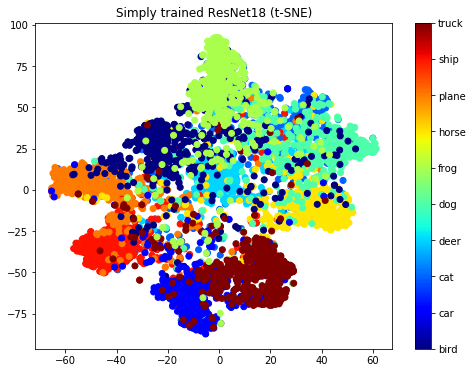

In [3]:
# Define model learner
def learner_conventional(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    learn = learner_conventional(all_data)
    visualize_learner_embeddings(learn, 'Simply trained ResNet18 (t-SNE)', all_data)

In [4]:
# Test model
toytest.do_tests('Conventional', learner_conventional, delete_models=True)


Testing Conventional for case #0


epoch,train_loss,valid_loss,accuracy,time
0,0.873027,0.656622,0.660000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.764050,0.668343,0.575000,00:01
1,0.702206,0.629851,0.625000,00:01
2,0.686014,0.556673,0.710000,00:02
3,0.638243,0.535484,0.725000,00:01
4,0.615301,0.461234,0.770000,00:01
5,0.588451,0.426032,0.805000,00:01
6,0.561184,0.401445,0.850000,00:01
7,0.549930,0.391715,0.855000,00:01
8,0.545915,0.384655,0.855000,00:01
9,0.538164,0.376286,0.835000,00:01


Better model found at epoch 0 with val_loss value: 0.6683425903320312.
Better model found at epoch 1 with val_loss value: 0.6298508644104004.
Better model found at epoch 2 with val_loss value: 0.556672990322113.
Better model found at epoch 3 with val_loss value: 0.5354835987091064.
Better model found at epoch 4 with val_loss value: 0.46123364567756653.
Better model found at epoch 5 with val_loss value: 0.42603182792663574.
Better model found at epoch 6 with val_loss value: 0.40144479274749756.
Better model found at epoch 7 with val_loss value: 0.3917146921157837.
Better model found at epoch 8 with val_loss value: 0.3846553862094879.
Better model found at epoch 9 with val_loss value: 0.3762863278388977.


epoch,train_loss,valid_loss,accuracy,time
0,0.487345,0.376711,0.825000,00:01
1,0.436799,0.367652,0.830000,00:01
2,0.417363,0.340417,0.855000,00:01
3,0.404814,0.309346,0.865000,00:01
4,0.400328,0.279995,0.865000,00:01
5,0.390638,0.281408,0.855000,00:01
6,0.383881,0.277654,0.845000,00:01
7,0.380394,0.287640,0.850000,00:01
8,0.369376,0.287692,0.850000,00:01
9,0.371201,0.290197,0.845000,00:01


Better model found at epoch 0 with val_loss value: 0.37671059370040894.
Better model found at epoch 1 with val_loss value: 0.367652028799057.
Better model found at epoch 2 with val_loss value: 0.34041744470596313.
Better model found at epoch 3 with val_loss value: 0.3093455731868744.
Better model found at epoch 4 with val_loss value: 0.2799951732158661.
Better model found at epoch 6 with val_loss value: 0.2776539921760559.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #1


epoch,train_loss,valid_loss,accuracy,time
0,0.941114,0.601879,0.670000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.694659,0.569135,0.755000,00:01
1,0.679205,0.504215,0.820000,00:01
2,0.636341,0.430075,0.830000,00:02
3,0.612293,0.357335,0.855000,00:01
4,0.600896,0.335191,0.860000,00:01
5,0.580525,0.405031,0.800000,00:01
6,0.546901,0.407804,0.805000,00:01
7,0.510231,0.388082,0.810000,00:01
8,0.504685,0.361551,0.810000,00:01
9,0.500180,0.355882,0.825000,00:01


Better model found at epoch 0 with val_loss value: 0.5691354274749756.
Better model found at epoch 1 with val_loss value: 0.5042147636413574.
Better model found at epoch 2 with val_loss value: 0.430074542760849.
Better model found at epoch 3 with val_loss value: 0.3573346734046936.
Better model found at epoch 4 with val_loss value: 0.3351910412311554.


epoch,train_loss,valid_loss,accuracy,time
0,0.510677,0.333920,0.855000,00:01
1,0.461217,0.329071,0.835000,00:01
2,0.452650,0.332539,0.830000,00:01
3,0.451912,0.283263,0.870000,00:01
4,0.450231,0.245616,0.905000,00:02
5,0.436448,0.222344,0.905000,00:01
6,0.428656,0.213504,0.910000,00:01
7,0.416086,0.218296,0.890000,00:01
8,0.409140,0.228888,0.885000,00:01
9,0.403655,0.234429,0.885000,00:01


Better model found at epoch 0 with val_loss value: 0.3339204490184784.
Better model found at epoch 1 with val_loss value: 0.3290713131427765.
Better model found at epoch 3 with val_loss value: 0.2832629978656769.
Better model found at epoch 4 with val_loss value: 0.24561631679534912.
Better model found at epoch 5 with val_loss value: 0.22234421968460083.
Better model found at epoch 6 with val_loss value: 0.21350446343421936.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #2


epoch,train_loss,valid_loss,accuracy,time
0,0.936987,0.588785,0.790000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.755779,0.582283,0.700000,00:01
1,0.727899,0.532587,0.760000,00:01
2,0.685762,0.459018,0.830000,00:01
3,0.621761,0.421647,0.785000,00:01
4,0.589981,0.377607,0.820000,00:01
5,0.568540,0.318171,0.880000,00:01
6,0.542100,0.297226,0.885000,00:01
7,0.511512,0.260612,0.920000,00:01
8,0.489632,0.234537,0.920000,00:01
9,0.480088,0.226462,0.925000,00:01


Better model found at epoch 0 with val_loss value: 0.5822832584381104.
Better model found at epoch 1 with val_loss value: 0.5325866937637329.
Better model found at epoch 2 with val_loss value: 0.4590182900428772.
Better model found at epoch 3 with val_loss value: 0.4216473400592804.
Better model found at epoch 4 with val_loss value: 0.37760651111602783.
Better model found at epoch 5 with val_loss value: 0.3181706368923187.
Better model found at epoch 6 with val_loss value: 0.297225683927536.
Better model found at epoch 7 with val_loss value: 0.2606121003627777.
Better model found at epoch 8 with val_loss value: 0.23453721404075623.
Better model found at epoch 9 with val_loss value: 0.2264622449874878.


epoch,train_loss,valid_loss,accuracy,time
0,0.363457,0.228081,0.910000,00:01
1,0.373616,0.237211,0.900000,00:01
2,0.363566,0.230848,0.910000,00:01
3,0.350465,0.224857,0.925000,00:01
4,0.355077,0.238893,0.935000,00:01
5,0.351438,0.219948,0.920000,00:02
6,0.336400,0.212012,0.925000,00:01
7,0.331770,0.206572,0.935000,00:01
8,0.328003,0.209070,0.930000,00:01
9,0.318974,0.212267,0.930000,00:01


Better model found at epoch 0 with val_loss value: 0.2280813753604889.
Better model found at epoch 3 with val_loss value: 0.22485731542110443.
Better model found at epoch 5 with val_loss value: 0.2199477255344391.
Better model found at epoch 6 with val_loss value: 0.21201233565807343.
Better model found at epoch 7 with val_loss value: 0.2065717726945877.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #3


epoch,train_loss,valid_loss,accuracy,time
0,0.913857,0.667176,0.515000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.774123,0.649865,0.545000,00:01
1,0.684764,0.578194,0.660000,00:02
2,0.650082,0.473753,0.765000,00:01
3,0.620078,0.396883,0.820000,00:01
4,0.591750,0.328251,0.855000,00:01
5,0.558509,0.308392,0.875000,00:01
6,0.539200,0.316810,0.855000,00:02
7,0.509088,0.322238,0.860000,00:01
8,0.498065,0.347073,0.880000,00:01
9,0.476091,0.363972,0.870000,00:01


Better model found at epoch 0 with val_loss value: 0.6498647332191467.
Better model found at epoch 1 with val_loss value: 0.5781938433647156.
Better model found at epoch 2 with val_loss value: 0.47375279664993286.
Better model found at epoch 3 with val_loss value: 0.3968832492828369.
Better model found at epoch 4 with val_loss value: 0.3282510042190552.
Better model found at epoch 5 with val_loss value: 0.3083919882774353.


epoch,train_loss,valid_loss,accuracy,time
0,0.393187,0.318089,0.865000,00:01
1,0.383366,0.337317,0.860000,00:01
2,0.383823,0.367951,0.880000,00:01
3,0.395262,0.404699,0.870000,00:01
4,0.391702,0.388597,0.855000,00:01
5,0.386041,0.377888,0.860000,00:01
6,0.378089,0.380389,0.850000,00:01
7,0.372628,0.387612,0.830000,00:01
8,0.370554,0.394300,0.820000,00:01
9,0.367237,0.395868,0.835000,00:01


Better model found at epoch 0 with val_loss value: 0.3180888891220093.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #4


epoch,train_loss,valid_loss,accuracy,time
0,0.940272,0.584921,0.720000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.803021,0.605925,0.620000,00:01
1,0.771228,0.605781,0.590000,00:01
2,0.755194,0.515602,0.780000,00:01
3,0.722392,0.635616,0.620000,00:02
4,0.675232,0.846419,0.595000,00:01
5,0.643780,0.803879,0.635000,00:01
6,0.612375,0.649189,0.670000,00:01
7,0.584388,0.542401,0.720000,00:01
8,0.559456,0.485153,0.765000,00:01
9,0.536507,0.442871,0.815000,00:01


Better model found at epoch 0 with val_loss value: 0.6059250831604004.
Better model found at epoch 1 with val_loss value: 0.605781078338623.
Better model found at epoch 2 with val_loss value: 0.5156019330024719.
Better model found at epoch 8 with val_loss value: 0.48515304923057556.
Better model found at epoch 9 with val_loss value: 0.44287118315696716.


epoch,train_loss,valid_loss,accuracy,time
0,0.462003,0.406222,0.830000,00:01
1,0.411924,0.377039,0.855000,00:01
2,0.383298,0.350806,0.845000,00:01
3,0.392334,0.328381,0.875000,00:01
4,0.371920,0.327603,0.855000,00:01
5,0.375113,0.359344,0.860000,00:01
6,0.376433,0.345408,0.855000,00:01
7,0.377025,0.320460,0.870000,00:01
8,0.377066,0.311726,0.885000,00:01
9,0.380636,0.315795,0.880000,00:01


Better model found at epoch 0 with val_loss value: 0.40622174739837646.
Better model found at epoch 1 with val_loss value: 0.3770385980606079.
Better model found at epoch 2 with val_loss value: 0.35080626606941223.
Better model found at epoch 3 with val_loss value: 0.3283810317516327.
Better model found at epoch 4 with val_loss value: 0.3276028335094452.
Better model found at epoch 7 with val_loss value: 0.32046031951904297.
Better model found at epoch 8 with val_loss value: 0.3117256164550781.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #5


epoch,train_loss,valid_loss,accuracy,time
0,0.885949,0.649307,0.585000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.864010,0.668340,0.530000,00:02
1,0.809448,0.614396,0.640000,00:01
2,0.773685,0.671344,0.615000,00:01
3,0.734550,0.678397,0.630000,00:01
4,0.670066,0.543053,0.680000,00:01
5,0.641087,0.531371,0.690000,00:01
6,0.624591,0.525695,0.700000,00:01
7,0.607333,0.524854,0.710000,00:01
8,0.585929,0.515157,0.720000,00:01
9,0.565637,0.516091,0.720000,00:01


Better model found at epoch 0 with val_loss value: 0.6683399677276611.
Better model found at epoch 1 with val_loss value: 0.6143960356712341.
Better model found at epoch 4 with val_loss value: 0.5430530905723572.
Better model found at epoch 5 with val_loss value: 0.5313707590103149.
Better model found at epoch 6 with val_loss value: 0.5256952047348022.
Better model found at epoch 7 with val_loss value: 0.5248540639877319.
Better model found at epoch 8 with val_loss value: 0.5151569843292236.


epoch,train_loss,valid_loss,accuracy,time
0,0.454482,0.508813,0.725000,00:01
1,0.431252,0.491902,0.765000,00:01
2,0.420077,0.477431,0.755000,00:01
3,0.402571,0.484270,0.735000,00:01
4,0.403563,0.471227,0.755000,00:01
5,0.402700,0.435843,0.800000,00:01
6,0.392098,0.424856,0.800000,00:01
7,0.383914,0.424779,0.785000,00:01
8,0.382161,0.424106,0.800000,00:01
9,0.381419,0.412342,0.805000,00:01


Better model found at epoch 0 with val_loss value: 0.508812665939331.
Better model found at epoch 1 with val_loss value: 0.49190226197242737.
Better model found at epoch 2 with val_loss value: 0.477431058883667.
Better model found at epoch 4 with val_loss value: 0.4712269604206085.
Better model found at epoch 5 with val_loss value: 0.43584316968917847.
Better model found at epoch 6 with val_loss value: 0.42485642433166504.
Better model found at epoch 7 with val_loss value: 0.4247785210609436.
Better model found at epoch 8 with val_loss value: 0.4241059422492981.
Better model found at epoch 9 with val_loss value: 0.41234222054481506.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #6


epoch,train_loss,valid_loss,accuracy,time
0,0.866106,0.648360,0.610000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.713217,0.676726,0.560000,00:01
1,0.733409,0.635066,0.640000,00:01
2,0.701149,0.662415,0.570000,00:01
3,0.653034,0.637930,0.620000,00:01
4,0.630520,0.622818,0.660000,00:01
5,0.597710,0.624076,0.670000,00:01
6,0.582662,0.627284,0.665000,00:01
7,0.561081,0.620055,0.690000,00:01
8,0.551528,0.571549,0.720000,00:01
9,0.528176,0.526728,0.765000,00:01


Better model found at epoch 0 with val_loss value: 0.6767259240150452.
Better model found at epoch 1 with val_loss value: 0.6350658535957336.
Better model found at epoch 4 with val_loss value: 0.6228175759315491.
Better model found at epoch 7 with val_loss value: 0.6200549602508545.
Better model found at epoch 8 with val_loss value: 0.5715494751930237.
Better model found at epoch 9 with val_loss value: 0.5267276763916016.


epoch,train_loss,valid_loss,accuracy,time
0,0.406738,0.495726,0.785000,00:01
1,0.398764,0.466097,0.815000,00:01
2,0.395225,0.441975,0.810000,00:01
3,0.376435,0.444222,0.825000,00:02
4,0.361618,0.460921,0.815000,00:01
5,0.362051,0.453412,0.825000,00:02
6,0.351651,0.440468,0.825000,00:01
7,0.343386,0.429130,0.805000,00:01
8,0.342533,0.429408,0.820000,00:01
9,0.341674,0.437913,0.810000,00:01


Better model found at epoch 0 with val_loss value: 0.49572575092315674.
Better model found at epoch 1 with val_loss value: 0.4660967290401459.
Better model found at epoch 2 with val_loss value: 0.4419748783111572.
Better model found at epoch 6 with val_loss value: 0.4404679238796234.
Better model found at epoch 7 with val_loss value: 0.4291298985481262.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #7


epoch,train_loss,valid_loss,accuracy,time
0,0.865451,0.622124,0.695000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.793128,0.620834,0.665000,00:01
1,0.754076,0.583507,0.710000,00:01
2,0.708521,0.524409,0.790000,00:01
3,0.667175,0.489238,0.765000,00:01
4,0.626629,0.430286,0.805000,00:01
5,0.608569,0.400149,0.825000,00:01
6,0.569711,0.382192,0.840000,00:02
7,0.542622,0.369216,0.860000,00:01
8,0.513725,0.358924,0.885000,00:01
9,0.505142,0.351383,0.880000,00:01


Better model found at epoch 0 with val_loss value: 0.6208340525627136.
Better model found at epoch 1 with val_loss value: 0.5835074782371521.
Better model found at epoch 2 with val_loss value: 0.5244093537330627.
Better model found at epoch 3 with val_loss value: 0.48923778533935547.
Better model found at epoch 4 with val_loss value: 0.43028563261032104.
Better model found at epoch 5 with val_loss value: 0.40014907717704773.
Better model found at epoch 6 with val_loss value: 0.3821921944618225.
Better model found at epoch 7 with val_loss value: 0.3692156672477722.
Better model found at epoch 8 with val_loss value: 0.35892441868782043.
Better model found at epoch 9 with val_loss value: 0.35138294100761414.


epoch,train_loss,valid_loss,accuracy,time
0,0.342731,0.346983,0.875000,00:01
1,0.363555,0.333569,0.870000,00:01
2,0.382879,0.308083,0.895000,00:01
3,0.389563,0.289877,0.905000,00:01
4,0.375352,0.272881,0.905000,00:01
5,0.370310,0.271663,0.905000,00:01
6,0.364101,0.266350,0.900000,00:01
7,0.358334,0.271560,0.900000,00:01
8,0.351462,0.259997,0.905000,00:01
9,0.348762,0.251591,0.900000,00:01


Better model found at epoch 0 with val_loss value: 0.34698349237442017.
Better model found at epoch 1 with val_loss value: 0.3335685729980469.
Better model found at epoch 2 with val_loss value: 0.3080834448337555.
Better model found at epoch 3 with val_loss value: 0.2898767292499542.
Better model found at epoch 4 with val_loss value: 0.2728809118270874.
Better model found at epoch 5 with val_loss value: 0.27166253328323364.
Better model found at epoch 6 with val_loss value: 0.26634976267814636.
Better model found at epoch 8 with val_loss value: 0.2599967122077942.
Better model found at epoch 9 with val_loss value: 0.25159144401550293.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #8


epoch,train_loss,valid_loss,accuracy,time
0,0.890128,0.651167,0.585000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.837679,0.647323,0.560000,00:01
1,0.730857,0.598216,0.710000,00:01
2,0.739880,0.524163,0.780000,00:01
3,0.658655,0.462228,0.785000,00:01
4,0.620829,0.379268,0.855000,00:01
5,0.584103,0.310401,0.900000,00:01
6,0.548673,0.325182,0.865000,00:01
7,0.535222,0.307887,0.875000,00:01
8,0.525386,0.294526,0.875000,00:01
9,0.513408,0.283234,0.895000,00:01


Better model found at epoch 0 with val_loss value: 0.6473232507705688.
Better model found at epoch 1 with val_loss value: 0.5982155799865723.
Better model found at epoch 2 with val_loss value: 0.5241633653640747.
Better model found at epoch 3 with val_loss value: 0.4622279107570648.
Better model found at epoch 4 with val_loss value: 0.37926849722862244.
Better model found at epoch 5 with val_loss value: 0.3104007840156555.
Better model found at epoch 7 with val_loss value: 0.3078872561454773.
Better model found at epoch 8 with val_loss value: 0.29452642798423767.
Better model found at epoch 9 with val_loss value: 0.28323397040367126.


epoch,train_loss,valid_loss,accuracy,time
0,0.403096,0.264292,0.900000,00:01
1,0.381869,0.250156,0.915000,00:01
2,0.373093,0.260862,0.895000,00:01
3,0.379460,0.271350,0.890000,00:01
4,0.379719,0.255242,0.910000,00:01
5,0.382459,0.248627,0.895000,00:01
6,0.380781,0.254447,0.890000,00:01
7,0.363049,0.256172,0.890000,00:01
8,0.357100,0.260442,0.895000,00:01
9,0.356106,0.262428,0.895000,00:01


Better model found at epoch 0 with val_loss value: 0.2642921507358551.
Better model found at epoch 1 with val_loss value: 0.25015580654144287.
Better model found at epoch 5 with val_loss value: 0.24862661957740784.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing Conventional for case #9


epoch,train_loss,valid_loss,accuracy,time
0,0.970939,0.702594,0.510000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.886316,0.722729,0.500000,00:01
1,0.793687,0.703701,0.510000,00:01
2,0.778868,0.644658,0.615000,00:01
3,0.746875,0.672510,0.605000,00:01
4,0.712017,0.657177,0.625000,00:01
5,0.678522,0.624714,0.655000,00:01
6,0.647804,0.589983,0.650000,00:01
7,0.617999,0.571069,0.660000,00:01
8,0.590436,0.575036,0.665000,00:01
9,0.563473,0.589344,0.670000,00:01


Better model found at epoch 0 with val_loss value: 0.7227292060852051.
Better model found at epoch 1 with val_loss value: 0.7037013173103333.
Better model found at epoch 2 with val_loss value: 0.6446579098701477.
Better model found at epoch 5 with val_loss value: 0.6247140169143677.
Better model found at epoch 6 with val_loss value: 0.589983344078064.
Better model found at epoch 7 with val_loss value: 0.5710687637329102.


epoch,train_loss,valid_loss,accuracy,time
0,0.480449,0.580713,0.665000,00:01
1,0.468428,0.597563,0.695000,00:01
2,0.460214,0.658359,0.665000,00:01
3,0.438245,0.755543,0.645000,00:01
4,0.421167,0.794467,0.655000,00:01
5,0.413288,0.815393,0.655000,00:01
6,0.400430,0.805281,0.670000,00:01
7,0.404523,0.783976,0.665000,00:01
8,0.402062,0.763123,0.685000,00:01
9,0.390600,0.745089,0.675000,00:01


Better model found at epoch 0 with val_loss value: 0.5807132720947266.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


In [5]:
distance_df, (auc, fpr, tpr), worst_test_info = toytest.results['Conventional'][0]
worst_test_info

,x,y,distance,train_idx,train_x,train_y
3957,car/img1_008056.png,car,0.222681,61,truck/img9_037454.png,truck
12,cat/img3_003513.png,cat,0.285016,76,truck/img9_020213.png,truck
4966,frog/img6_005556.png,frog,0.256172,52,truck/img9_034526.png,truck
2092,horse/img7_003071.png,horse,0.263182,52,truck/img9_034526.png,truck
4658,frog/img6_004073.png,frog,0.218658,55,truck/img9_037071.png,truck


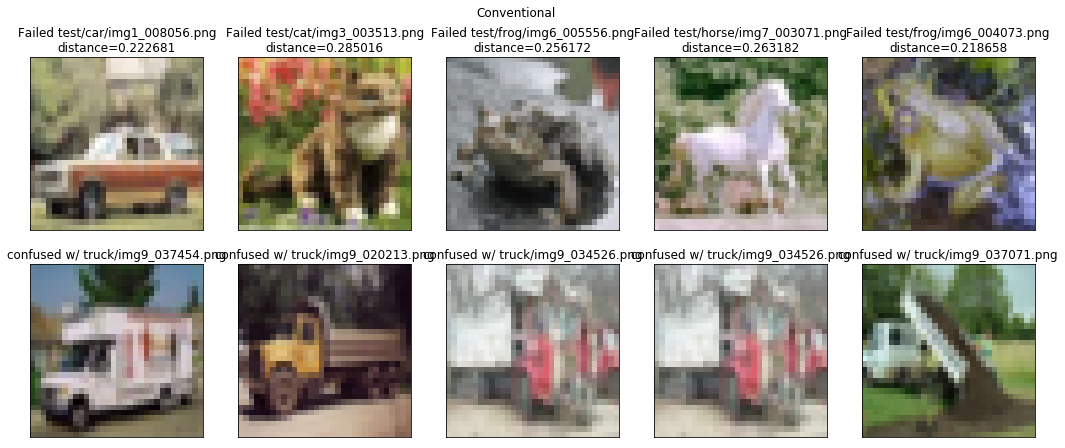

In [6]:
toytest.show_worst_test_images('Conventional', worst_test_info, 0)

## 2. L2-constrained Softmax Loss

- R. Ranjan, C. D. Castillo, and R. Chellappa. L2-constrained softmax loss for discriminative face verification. arXiv preprint arXiv:1703.09507, 2017. https://arxiv.org/pdf/1703.09507.pdf

epoch,train_loss,valid_loss,accuracy,time
0,2.273461,2.041438,0.262500,00:02


epoch,train_loss,valid_loss,accuracy,time
0,2.081059,1.928481,0.358333,00:02
1,1.978544,1.743043,0.418750,00:02
2,1.859146,1.579628,0.522917,00:02
3,1.753168,1.480161,0.572917,00:02
4,1.646843,1.424551,0.600000,00:02
5,1.561872,1.405177,0.620833,00:02
6,1.489361,1.380547,0.622917,00:02
7,1.426605,1.374735,0.620833,00:02
8,1.386511,1.361960,0.620833,00:02
9,1.356395,1.343645,0.647917,00:02


Better model found at epoch 0 with val_loss value: 1.9284805059432983.
Better model found at epoch 1 with val_loss value: 1.743043065071106.
Better model found at epoch 2 with val_loss value: 1.5796284675598145.
Better model found at epoch 3 with val_loss value: 1.4801610708236694.
Better model found at epoch 4 with val_loss value: 1.4245508909225464.
Better model found at epoch 5 with val_loss value: 1.4051768779754639.
Better model found at epoch 6 with val_loss value: 1.3805465698242188.
Better model found at epoch 7 with val_loss value: 1.3747354745864868.
Better model found at epoch 8 with val_loss value: 1.3619600534439087.
Better model found at epoch 9 with val_loss value: 1.3436449766159058.


epoch,train_loss,valid_loss,accuracy,time
0,1.311212,1.341806,0.637500,00:02
1,1.309450,1.343053,0.635417,00:02
2,1.315216,1.442384,0.600000,00:02
3,1.317351,1.473319,0.591667,00:02
4,1.299379,1.371290,0.629167,00:02
5,1.274418,1.294747,0.664583,00:02
6,1.254277,1.340154,0.633333,00:02
7,1.219231,1.311677,0.660417,00:02
8,1.203230,1.309619,0.656250,00:02
9,1.188535,1.307991,0.650000,00:02


Better model found at epoch 0 with val_loss value: 1.3418056964874268.
Better model found at epoch 5 with val_loss value: 1.2947471141815186.


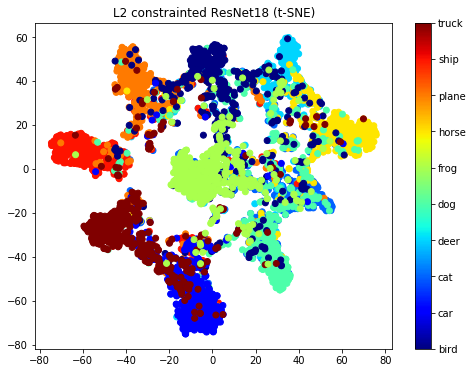

In [7]:
# Define model learner
class L2ConstrainedNet(nn.Module):
    def __init__(self, org_model, alpha=16, num_classes=1000):
        super().__init__()
        self.org_model = org_model
        self.alpha = alpha

    def forward(self, x):
        x = self.org_model(x)
        
        l2 = torch.sqrt((x**2).sum())
        x = self.alpha * (x / l2)
        return x

def learner_L2ConstrainedNet(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.model = L2ConstrainedNet(learn.model)
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_L2ConstrainedNet(all_data), 'L2 constrained ResNet18 (t-SNE)', all_data)

In [8]:
toytest.do_tests('L2-constrained', learner_L2ConstrainedNet, delete_models=True)


Testing L2-constrained for case #0


epoch,train_loss,valid_loss,accuracy,time
0,1.079564,1.361084,0.540000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.751678,1.270391,0.510000,00:01
1,0.717875,0.815924,0.540000,00:01
2,0.669693,0.669375,0.610000,00:01
3,0.613163,0.696739,0.615000,00:01
4,0.574577,0.703727,0.640000,00:01
5,0.543993,0.576410,0.740000,00:01
6,0.515053,0.446993,0.825000,00:01
7,0.491094,0.375616,0.865000,00:01
8,0.479435,0.342252,0.865000,00:01
9,0.459686,0.333759,0.855000,00:01


Better model found at epoch 0 with val_loss value: 1.2703906297683716.
Better model found at epoch 1 with val_loss value: 0.8159238696098328.
Better model found at epoch 2 with val_loss value: 0.6693746447563171.
Better model found at epoch 5 with val_loss value: 0.5764098167419434.
Better model found at epoch 6 with val_loss value: 0.44699278473854065.
Better model found at epoch 7 with val_loss value: 0.3756161034107208.
Better model found at epoch 8 with val_loss value: 0.3422515094280243.
Better model found at epoch 9 with val_loss value: 0.3337585926055908.


epoch,train_loss,valid_loss,accuracy,time
0,0.345160,0.333992,0.855000,00:01
1,0.353877,0.325637,0.850000,00:02
2,0.332500,0.309261,0.865000,00:01
3,0.314778,0.284451,0.870000,00:01
4,0.308449,0.267551,0.875000,00:01
5,0.304532,0.260761,0.870000,00:01
6,0.294989,0.262438,0.870000,00:01
7,0.295572,0.266241,0.875000,00:01
8,0.298580,0.270501,0.875000,00:01
9,0.294138,0.271064,0.870000,00:01


Better model found at epoch 0 with val_loss value: 0.3339918255805969.
Better model found at epoch 1 with val_loss value: 0.3256373107433319.
Better model found at epoch 2 with val_loss value: 0.30926114320755005.
Better model found at epoch 3 with val_loss value: 0.2844511866569519.
Better model found at epoch 4 with val_loss value: 0.2675514221191406.
Better model found at epoch 5 with val_loss value: 0.26076051592826843.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #1


epoch,train_loss,valid_loss,accuracy,time
0,0.939302,0.756817,0.640000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.756669,0.666874,0.675000,00:01
1,0.713389,0.405881,0.815000,00:01
2,0.645042,0.371464,0.835000,00:01
3,0.583751,0.351573,0.845000,00:01
4,0.538625,0.269281,0.900000,00:01
5,0.511399,0.247273,0.905000,00:01
6,0.483143,0.249600,0.910000,00:01
7,0.463216,0.259459,0.915000,00:01
8,0.446128,0.266188,0.900000,00:01
9,0.432033,0.279472,0.905000,00:01


Better model found at epoch 0 with val_loss value: 0.6668736338615417.
Better model found at epoch 1 with val_loss value: 0.40588077902793884.
Better model found at epoch 2 with val_loss value: 0.3714640140533447.
Better model found at epoch 3 with val_loss value: 0.35157325863838196.
Better model found at epoch 4 with val_loss value: 0.2692805528640747.
Better model found at epoch 5 with val_loss value: 0.24727343022823334.


epoch,train_loss,valid_loss,accuracy,time
0,0.367543,0.250385,0.905000,00:01
1,0.377324,0.251460,0.915000,00:01
2,0.364806,0.246957,0.925000,00:01
3,0.338497,0.245410,0.920000,00:01
4,0.332933,0.242771,0.905000,00:01
5,0.325243,0.241654,0.920000,00:01
6,0.319927,0.242217,0.920000,00:01
7,0.311742,0.239383,0.925000,00:01
8,0.311137,0.235067,0.930000,00:01
9,0.305114,0.236966,0.925000,00:01


Better model found at epoch 0 with val_loss value: 0.250385046005249.
Better model found at epoch 2 with val_loss value: 0.2469566911458969.
Better model found at epoch 3 with val_loss value: 0.24541042745113373.
Better model found at epoch 4 with val_loss value: 0.2427711933851242.
Better model found at epoch 5 with val_loss value: 0.2416544407606125.
Better model found at epoch 7 with val_loss value: 0.23938314616680145.
Better model found at epoch 8 with val_loss value: 0.2350674271583557.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #2


epoch,train_loss,valid_loss,accuracy,time
0,1.278906,0.479444,0.790000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.732181,0.742041,0.725000,00:01
1,0.713834,0.616880,0.730000,00:01
2,0.662971,0.446747,0.805000,00:02
3,0.607228,0.520974,0.740000,00:01
4,0.559192,0.433756,0.805000,00:01
5,0.526049,0.329127,0.855000,00:01
6,0.486877,0.261130,0.915000,00:01
7,0.458758,0.234100,0.935000,00:01
8,0.435139,0.219649,0.935000,00:01
9,0.419038,0.218301,0.940000,00:01


Better model found at epoch 0 with val_loss value: 0.7420406937599182.
Better model found at epoch 1 with val_loss value: 0.6168795228004456.
Better model found at epoch 2 with val_loss value: 0.4467468559741974.
Better model found at epoch 4 with val_loss value: 0.43375614285469055.
Better model found at epoch 5 with val_loss value: 0.32912716269493103.
Better model found at epoch 6 with val_loss value: 0.2611295282840729.
Better model found at epoch 7 with val_loss value: 0.23410019278526306.
Better model found at epoch 8 with val_loss value: 0.21964935958385468.
Better model found at epoch 9 with val_loss value: 0.2183009684085846.


epoch,train_loss,valid_loss,accuracy,time
0,0.329924,0.220395,0.945000,00:01
1,0.307905,0.221594,0.935000,00:01
2,0.303297,0.221376,0.940000,00:01
3,0.302502,0.216673,0.925000,00:01
4,0.295067,0.210009,0.935000,00:01
5,0.296947,0.207912,0.925000,00:01
6,0.297922,0.204316,0.925000,00:01
7,0.286426,0.200497,0.925000,00:01
8,0.288714,0.202914,0.925000,00:01
9,0.285040,0.202587,0.915000,00:01


Better model found at epoch 0 with val_loss value: 0.22039474546909332.
Better model found at epoch 3 with val_loss value: 0.2166728973388672.
Better model found at epoch 4 with val_loss value: 0.21000927686691284.
Better model found at epoch 5 with val_loss value: 0.20791205763816833.
Better model found at epoch 6 with val_loss value: 0.20431560277938843.
Better model found at epoch 7 with val_loss value: 0.2004973292350769.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #3


epoch,train_loss,valid_loss,accuracy,time
0,0.937164,0.772311,0.645000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.713732,0.861818,0.660000,00:01
1,0.691469,0.553563,0.740000,00:01
2,0.628130,0.690733,0.670000,00:01
3,0.595979,0.461989,0.785000,00:01
4,0.554459,0.374347,0.815000,00:01
5,0.521109,0.311016,0.885000,00:01
6,0.488766,0.289695,0.895000,00:01
7,0.466539,0.295220,0.900000,00:01
8,0.450396,0.314776,0.895000,00:01
9,0.441038,0.335939,0.885000,00:01


Better model found at epoch 0 with val_loss value: 0.8618179559707642.
Better model found at epoch 1 with val_loss value: 0.5535630583763123.
Better model found at epoch 3 with val_loss value: 0.4619885981082916.
Better model found at epoch 4 with val_loss value: 0.37434712052345276.
Better model found at epoch 5 with val_loss value: 0.3110155761241913.
Better model found at epoch 6 with val_loss value: 0.2896946966648102.


epoch,train_loss,valid_loss,accuracy,time
0,0.345108,0.297580,0.900000,00:01
1,0.328626,0.308235,0.900000,00:01
2,0.331843,0.320785,0.885000,00:01
3,0.321847,0.336401,0.885000,00:01
4,0.320863,0.346755,0.890000,00:01
5,0.310590,0.347789,0.890000,00:01
6,0.308783,0.357006,0.880000,00:01
7,0.301459,0.348667,0.890000,00:01
8,0.299588,0.347474,0.890000,00:01
9,0.297711,0.354080,0.885000,00:01


Better model found at epoch 0 with val_loss value: 0.2975800037384033.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #4


epoch,train_loss,valid_loss,accuracy,time
0,1.021716,0.771836,0.710000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.819404,0.555099,0.745000,00:01
1,0.750559,0.926791,0.605000,00:01
2,0.708123,0.800083,0.585000,00:01
3,0.649921,0.668570,0.630000,00:01
4,0.601216,0.634758,0.665000,00:01
5,0.567864,0.606085,0.705000,00:01
6,0.541228,0.530593,0.755000,00:01
7,0.515636,0.469138,0.760000,00:01
8,0.494497,0.419633,0.795000,00:01
9,0.479581,0.390183,0.840000,00:01


Better model found at epoch 0 with val_loss value: 0.5550991892814636.
Better model found at epoch 6 with val_loss value: 0.5305931568145752.
Better model found at epoch 7 with val_loss value: 0.4691377282142639.
Better model found at epoch 8 with val_loss value: 0.41963276267051697.
Better model found at epoch 9 with val_loss value: 0.390182763338089.


epoch,train_loss,valid_loss,accuracy,time
0,0.391048,0.372053,0.845000,00:01
1,0.384695,0.352190,0.870000,00:01
2,0.366013,0.348887,0.865000,00:01
3,0.361213,0.335528,0.875000,00:01
4,0.349711,0.331648,0.875000,00:01
5,0.341355,0.334225,0.875000,00:01
6,0.337435,0.337297,0.875000,00:01
7,0.328098,0.332768,0.875000,00:01
8,0.323664,0.334580,0.860000,00:01
9,0.324810,0.337835,0.865000,00:01


Better model found at epoch 0 with val_loss value: 0.3720531761646271.
Better model found at epoch 1 with val_loss value: 0.35218966007232666.
Better model found at epoch 2 with val_loss value: 0.34888651967048645.
Better model found at epoch 3 with val_loss value: 0.3355276882648468.
Better model found at epoch 4 with val_loss value: 0.3316476047039032.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #5


epoch,train_loss,valid_loss,accuracy,time
0,0.925089,0.894227,0.650000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.661949,1.315719,0.550000,00:01
1,0.754998,1.072247,0.560000,00:01
2,0.711570,0.743635,0.640000,00:01
3,0.686537,0.665330,0.665000,00:01
4,0.649583,0.595441,0.715000,00:01
5,0.611878,0.527675,0.715000,00:01
6,0.575167,0.472912,0.760000,00:01
7,0.553488,0.449729,0.790000,00:01
8,0.544659,0.450305,0.760000,00:01
9,0.525827,0.453523,0.755000,00:01


Better model found at epoch 0 with val_loss value: 1.315719485282898.
Better model found at epoch 1 with val_loss value: 1.0722466707229614.
Better model found at epoch 2 with val_loss value: 0.7436352372169495.
Better model found at epoch 3 with val_loss value: 0.6653295755386353.
Better model found at epoch 4 with val_loss value: 0.595440685749054.
Better model found at epoch 5 with val_loss value: 0.5276751518249512.
Better model found at epoch 6 with val_loss value: 0.4729124903678894.
Better model found at epoch 7 with val_loss value: 0.44972899556159973.


epoch,train_loss,valid_loss,accuracy,time
0,0.386250,0.449105,0.770000,00:01
1,0.383182,0.432879,0.770000,00:01
2,0.392866,0.416763,0.780000,00:01
3,0.383871,0.405443,0.800000,00:01
4,0.380689,0.396889,0.805000,00:01
5,0.378427,0.396842,0.810000,00:01
6,0.363117,0.397282,0.810000,00:01
7,0.358201,0.400336,0.800000,00:01
8,0.350036,0.403472,0.800000,00:01
9,0.341523,0.400216,0.795000,00:01


Better model found at epoch 0 with val_loss value: 0.4491047263145447.
Better model found at epoch 1 with val_loss value: 0.43287909030914307.
Better model found at epoch 2 with val_loss value: 0.4167626202106476.
Better model found at epoch 3 with val_loss value: 0.40544307231903076.
Better model found at epoch 4 with val_loss value: 0.396889328956604.
Better model found at epoch 5 with val_loss value: 0.39684224128723145.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #6


epoch,train_loss,valid_loss,accuracy,time
0,1.006533,0.740253,0.615000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.732482,0.667153,0.625000,00:01
1,0.699073,0.671530,0.570000,00:01
2,0.642134,0.662472,0.570000,00:01
3,0.599098,0.619943,0.635000,00:01
4,0.556138,0.605377,0.635000,00:01
5,0.522442,0.586288,0.700000,00:01
6,0.500942,0.547352,0.760000,00:01
7,0.484578,0.522055,0.765000,00:01
8,0.468070,0.487690,0.775000,00:01
9,0.454742,0.473583,0.780000,00:01


Better model found at epoch 0 with val_loss value: 0.6671529412269592.
Better model found at epoch 2 with val_loss value: 0.6624717712402344.
Better model found at epoch 3 with val_loss value: 0.6199432015419006.
Better model found at epoch 4 with val_loss value: 0.6053769588470459.
Better model found at epoch 5 with val_loss value: 0.5862882137298584.
Better model found at epoch 6 with val_loss value: 0.5473517179489136.
Better model found at epoch 7 with val_loss value: 0.5220553874969482.
Better model found at epoch 8 with val_loss value: 0.4876896142959595.
Better model found at epoch 9 with val_loss value: 0.47358256578445435.


epoch,train_loss,valid_loss,accuracy,time
0,0.348585,0.456608,0.795000,00:01
1,0.354671,0.436135,0.805000,00:01
2,0.358303,0.407886,0.800000,00:01
3,0.351170,0.389877,0.805000,00:01
4,0.338068,0.390681,0.815000,00:01
5,0.331944,0.374934,0.840000,00:01
6,0.317444,0.370173,0.820000,00:01
7,0.313513,0.376580,0.810000,00:01
8,0.309726,0.382054,0.815000,00:01
9,0.303633,0.380518,0.800000,00:01


Better model found at epoch 0 with val_loss value: 0.4566083550453186.
Better model found at epoch 1 with val_loss value: 0.4361349046230316.
Better model found at epoch 2 with val_loss value: 0.4078861176967621.
Better model found at epoch 3 with val_loss value: 0.38987666368484497.
Better model found at epoch 5 with val_loss value: 0.3749343156814575.
Better model found at epoch 6 with val_loss value: 0.370172917842865.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #7


epoch,train_loss,valid_loss,accuracy,time
0,0.964947,1.046182,0.545000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.717622,0.805544,0.550000,00:01
1,0.730999,0.506427,0.795000,00:01
2,0.659685,0.506230,0.805000,00:01
3,0.602914,0.461155,0.815000,00:01
4,0.562475,0.452801,0.810000,00:01
5,0.534933,0.396343,0.845000,00:01
6,0.507319,0.358888,0.850000,00:02
7,0.481683,0.338627,0.865000,00:01
8,0.458086,0.333992,0.880000,00:01
9,0.440280,0.330995,0.875000,00:01


Better model found at epoch 0 with val_loss value: 0.8055438995361328.
Better model found at epoch 1 with val_loss value: 0.5064274668693542.
Better model found at epoch 2 with val_loss value: 0.506230354309082.
Better model found at epoch 3 with val_loss value: 0.46115508675575256.
Better model found at epoch 4 with val_loss value: 0.45280125737190247.
Better model found at epoch 5 with val_loss value: 0.39634284377098083.
Better model found at epoch 6 with val_loss value: 0.3588877022266388.
Better model found at epoch 7 with val_loss value: 0.3386270999908447.
Better model found at epoch 8 with val_loss value: 0.3339921534061432.
Better model found at epoch 9 with val_loss value: 0.330994576215744.


epoch,train_loss,valid_loss,accuracy,time
0,0.353241,0.330763,0.880000,00:01
1,0.321514,0.320373,0.885000,00:01
2,0.325872,0.306293,0.885000,00:01
3,0.322829,0.300646,0.885000,00:01
4,0.321788,0.299882,0.880000,00:01
5,0.315735,0.283486,0.905000,00:01
6,0.310779,0.277709,0.905000,00:01
7,0.302139,0.274510,0.905000,00:01
8,0.296439,0.276851,0.900000,00:01
9,0.295472,0.274248,0.895000,00:01


Better model found at epoch 0 with val_loss value: 0.3307632803916931.
Better model found at epoch 1 with val_loss value: 0.32037314772605896.
Better model found at epoch 2 with val_loss value: 0.30629345774650574.
Better model found at epoch 3 with val_loss value: 0.30064597725868225.
Better model found at epoch 4 with val_loss value: 0.29988211393356323.
Better model found at epoch 5 with val_loss value: 0.2834858000278473.
Better model found at epoch 6 with val_loss value: 0.27770867943763733.
Better model found at epoch 7 with val_loss value: 0.27450987696647644.
Better model found at epoch 9 with val_loss value: 0.2742476463317871.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #8


epoch,train_loss,valid_loss,accuracy,time
0,0.954713,1.103689,0.540000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.695719,1.171920,0.550000,00:01
1,0.666811,0.631314,0.705000,00:01
2,0.615561,0.422870,0.810000,00:01
3,0.571712,0.410445,0.845000,00:01
4,0.528418,0.407222,0.870000,00:01
5,0.491091,0.370679,0.875000,00:01
6,0.468380,0.322193,0.885000,00:01
7,0.450912,0.281245,0.890000,00:01
8,0.433769,0.266583,0.875000,00:01
9,0.422571,0.267034,0.885000,00:01


Better model found at epoch 0 with val_loss value: 1.1719200611114502.
Better model found at epoch 1 with val_loss value: 0.6313140392303467.
Better model found at epoch 2 with val_loss value: 0.4228695333003998.
Better model found at epoch 3 with val_loss value: 0.4104454815387726.
Better model found at epoch 4 with val_loss value: 0.4072222411632538.
Better model found at epoch 5 with val_loss value: 0.3706791400909424.
Better model found at epoch 6 with val_loss value: 0.32219305634498596.
Better model found at epoch 7 with val_loss value: 0.2812449634075165.
Better model found at epoch 8 with val_loss value: 0.26658347249031067.


epoch,train_loss,valid_loss,accuracy,time
0,0.341996,0.259172,0.885000,00:01
1,0.323929,0.259615,0.900000,00:01
2,0.325506,0.250704,0.905000,00:01
3,0.318694,0.251539,0.920000,00:01
4,0.317382,0.247660,0.915000,00:01
5,0.320485,0.252666,0.910000,00:01
6,0.318300,0.250687,0.920000,00:01
7,0.311119,0.249509,0.925000,00:01
8,0.307918,0.248459,0.920000,00:01
9,0.303706,0.250221,0.925000,00:02


Better model found at epoch 0 with val_loss value: 0.25917157530784607.
Better model found at epoch 2 with val_loss value: 0.2507041394710541.
Better model found at epoch 4 with val_loss value: 0.24766001105308533.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing L2-constrained for case #9


epoch,train_loss,valid_loss,accuracy,time
0,1.049328,0.781525,0.620000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.846715,0.782142,0.505000,00:01
1,0.850005,0.678699,0.510000,00:02
2,0.770149,0.642447,0.580000,00:01
3,0.717335,0.635705,0.615000,00:02
4,0.666446,0.635064,0.605000,00:01
5,0.623186,0.644409,0.635000,00:01
6,0.592644,0.648945,0.650000,00:01
7,0.566449,0.654903,0.685000,00:01
8,0.541952,0.641479,0.670000,00:01
9,0.520129,0.613547,0.720000,00:01


Better model found at epoch 0 with val_loss value: 0.7821415066719055.
Better model found at epoch 1 with val_loss value: 0.6786993145942688.
Better model found at epoch 2 with val_loss value: 0.6424465775489807.
Better model found at epoch 3 with val_loss value: 0.6357049345970154.
Better model found at epoch 4 with val_loss value: 0.635063886642456.
Better model found at epoch 9 with val_loss value: 0.6135470867156982.


epoch,train_loss,valid_loss,accuracy,time
0,0.420462,0.601390,0.735000,00:01
1,0.390753,0.583563,0.755000,00:01
2,0.377013,0.572577,0.765000,00:01
3,0.356321,0.575372,0.755000,00:01
4,0.353855,0.574165,0.755000,00:01
5,0.344090,0.581473,0.750000,00:01
6,0.337680,0.576831,0.760000,00:01
7,0.326258,0.576348,0.765000,00:02
8,0.322728,0.571638,0.785000,00:01
9,0.316590,0.569159,0.790000,00:01


Better model found at epoch 0 with val_loss value: 0.6013901829719543.
Better model found at epoch 1 with val_loss value: 0.5835628509521484.
Better model found at epoch 2 with val_loss value: 0.5725772380828857.
Better model found at epoch 8 with val_loss value: 0.5716383457183838.
Better model found at epoch 9 with val_loss value: 0.5691591501235962.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


## 3. ArcFace

- J. Deng, J. Guo, and S. Zafeiriou. Arcface: Additive angular margin loss for deep face recognition. arXiv preprint arXiv:1801.07698, 2018. https://arxiv.org/pdf/1801.07698.pdf
- Pytorch implementation: https://github.com/ronghuaiyang/arcface-pytorch

In [9]:
try:
    from metrics import *
except:
    ! wget https://raw.githubusercontent.com/ronghuaiyang/arcface-pytorch/master/models/metrics.py
    from metrics import *

epoch,train_loss,valid_loss,accuracy,time
0,16.753317,16.176216,0.000000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,16.328379,16.169886,0.000000,00:02
1,15.954241,15.416967,0.000000,00:02
2,15.043891,14.273371,0.154167,00:02
3,13.368629,12.114532,0.354167,00:02
4,11.360225,13.113043,0.414583,00:02
5,9.529971,11.393567,0.477083,00:02
6,7.668630,11.033595,0.500000,00:02
7,6.261384,10.913339,0.516667,00:02
8,5.213090,11.055776,0.527083,00:02
9,4.472433,10.831175,0.529167,00:02


Better model found at epoch 0 with val_loss value: 16.169885635375977.
Better model found at epoch 1 with val_loss value: 15.416967391967773.
Better model found at epoch 2 with val_loss value: 14.273370742797852.
Better model found at epoch 3 with val_loss value: 12.114532470703125.
Better model found at epoch 5 with val_loss value: 11.393567085266113.
Better model found at epoch 6 with val_loss value: 11.033595085144043.
Better model found at epoch 7 with val_loss value: 10.913338661193848.
Better model found at epoch 9 with val_loss value: 10.831174850463867.


epoch,train_loss,valid_loss,accuracy,time
0,3.500529,10.736106,0.529167,00:02
1,3.383270,10.774176,0.554167,00:02
2,3.774654,13.112518,0.512500,00:02
3,4.069808,13.395480,0.518750,00:02
4,4.117500,12.338717,0.558333,00:02
5,3.680821,12.620736,0.560417,00:02
6,3.117324,12.356071,0.570833,00:02
7,2.529494,11.874506,0.595833,00:02
8,2.007724,11.731593,0.587500,00:02
9,1.674441,11.549381,0.583333,00:02


Better model found at epoch 0 with val_loss value: 10.736105918884277.


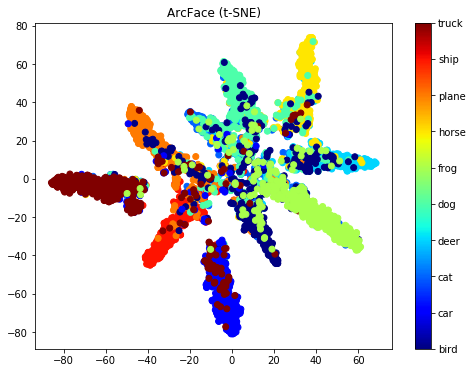

In [10]:
class LabelCatcher(LearnerCallback):
    last_labels = None

    def __init__(self, learn:Learner):
        super().__init__(learn)
        
    def on_batch_begin(self, last_input, last_target, train, **kwargs):
        LabelCatcher.last_labels = last_target
        return {'last_input': last_input, 'last_target': last_target} 


class XFaceNet(nn.Module):
    def __init__(self, org_model, data, xface_product=ArcMarginProduct, m=0.5):
        super().__init__()
        self.org_model = org_model
        self.feature_model = body_feature_model(org_model)
        self.metric_fc = xface_product(512, data.c, m=m).cuda()
    
    def forward(self, x):
        x = self.feature_model(x)
        x = self.metric_fc(x, LabelCatcher.last_labels)
        return x


def learner_ArcFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, ArcMarginProduct, m=0.5)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_ArcFace(all_data), 'ArcFace (t-SNE)', all_data)

In [11]:
toytest.do_tests('ArcFace', learner_ArcFace, delete_models=True)


Testing ArcFace for case #0


epoch,train_loss,valid_loss,accuracy,time
0,14.397841,12.857287,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.363838,12.474447,0.000000,00:01
1,13.001813,11.259106,0.000000,00:01
2,12.229350,9.338387,0.220000,00:01
3,10.612162,7.253638,0.510000,00:01
4,9.042411,5.705138,0.675000,00:01
5,7.623043,4.354316,0.775000,00:01
6,6.614983,3.734265,0.775000,00:01
7,5.738356,3.661843,0.780000,00:01
8,5.062456,3.711141,0.765000,00:01
9,4.494101,3.748215,0.760000,00:01


Better model found at epoch 0 with val_loss value: 12.474447250366211.
Better model found at epoch 1 with val_loss value: 11.259105682373047.
Better model found at epoch 2 with val_loss value: 9.338387489318848.
Better model found at epoch 3 with val_loss value: 7.25363826751709.
Better model found at epoch 4 with val_loss value: 5.705137729644775.
Better model found at epoch 5 with val_loss value: 4.354316234588623.
Better model found at epoch 6 with val_loss value: 3.734264850616455.
Better model found at epoch 7 with val_loss value: 3.6618432998657227.


epoch,train_loss,valid_loss,accuracy,time
0,0.823635,3.779286,0.775000,00:02
1,0.956999,3.838752,0.780000,00:01
2,0.759480,3.579540,0.790000,00:01
3,0.641642,3.436924,0.790000,00:01
4,0.542560,3.338106,0.795000,00:01
5,0.480886,3.401823,0.800000,00:01
6,0.417933,3.362581,0.795000,00:01
7,0.371519,3.323437,0.800000,00:01
8,0.336147,3.328582,0.805000,00:01
9,0.309730,3.363674,0.800000,00:01


Better model found at epoch 0 with val_loss value: 3.7792861461639404.
Better model found at epoch 2 with val_loss value: 3.5795397758483887.
Better model found at epoch 3 with val_loss value: 3.4369237422943115.
Better model found at epoch 4 with val_loss value: 3.3381056785583496.
Better model found at epoch 7 with val_loss value: 3.323436975479126.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #1


epoch,train_loss,valid_loss,accuracy,time
0,14.131806,12.634056,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.115621,12.011670,0.000000,00:01
1,12.723702,10.240109,0.000000,00:01
2,11.840791,5.822389,0.285000,00:01
3,10.247850,2.746106,0.725000,00:01
4,8.465892,1.760167,0.850000,00:01
5,7.071038,1.418107,0.880000,00:01
6,6.015270,1.295658,0.890000,00:01
7,5.208961,1.240656,0.875000,00:01
8,4.543564,1.277377,0.875000,00:01
9,4.020549,1.298100,0.865000,00:01


Better model found at epoch 0 with val_loss value: 12.011670112609863.
Better model found at epoch 1 with val_loss value: 10.24010944366455.
Better model found at epoch 2 with val_loss value: 5.822389125823975.
Better model found at epoch 3 with val_loss value: 2.746105909347534.
Better model found at epoch 4 with val_loss value: 1.7601666450500488.
Better model found at epoch 5 with val_loss value: 1.418107271194458.
Better model found at epoch 6 with val_loss value: 1.2956582307815552.
Better model found at epoch 7 with val_loss value: 1.240655779838562.


epoch,train_loss,valid_loss,accuracy,time
0,0.233929,1.283939,0.865000,00:01
1,0.237124,1.343644,0.875000,00:01
2,0.207869,1.322484,0.890000,00:01
3,0.198268,1.302228,0.900000,00:01
4,0.194451,1.430154,0.875000,00:01
5,0.241568,1.611719,0.865000,00:01
6,0.226758,1.617622,0.870000,00:01
7,0.193480,1.678950,0.860000,00:02
8,0.173667,1.702762,0.850000,00:01
9,0.160848,1.698440,0.845000,00:01


Better model found at epoch 0 with val_loss value: 1.2839388847351074.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #2


epoch,train_loss,valid_loss,accuracy,time
0,14.228842,12.153747,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,12.907331,11.563822,0.000000,00:01
1,12.483710,10.927295,0.355000,00:01
2,10.931020,13.446129,0.490000,00:01
3,8.794270,12.734006,0.530000,00:01
4,6.959646,9.484154,0.595000,00:01
5,5.728765,5.004155,0.690000,00:01
6,4.816919,2.734919,0.795000,00:01
7,4.105479,1.920566,0.865000,00:01
8,3.597020,1.718987,0.880000,00:01
9,3.170196,1.743588,0.885000,00:02


Better model found at epoch 0 with val_loss value: 11.563821792602539.
Better model found at epoch 1 with val_loss value: 10.927294731140137.
Better model found at epoch 4 with val_loss value: 9.484153747558594.
Better model found at epoch 5 with val_loss value: 5.004154682159424.
Better model found at epoch 6 with val_loss value: 2.7349188327789307.
Better model found at epoch 7 with val_loss value: 1.9205660820007324.
Better model found at epoch 8 with val_loss value: 1.7189868688583374.


epoch,train_loss,valid_loss,accuracy,time
0,0.175657,1.717345,0.890000,00:01
1,0.205607,1.759689,0.885000,00:01
2,0.188760,1.841834,0.900000,00:01
3,0.175215,1.964486,0.885000,00:01
4,0.173279,1.964553,0.900000,00:01
5,0.194327,2.016789,0.885000,00:01
6,0.204371,1.969912,0.870000,00:01
7,0.200150,2.084793,0.875000,00:02
8,0.188599,2.137349,0.870000,00:01
9,0.185973,2.084125,0.870000,00:02


Better model found at epoch 0 with val_loss value: 1.7173449993133545.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #3


epoch,train_loss,valid_loss,accuracy,time
0,14.102123,12.798767,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.443667,11.914528,0.000000,00:01
1,13.025712,10.763115,0.065000,00:01
2,12.091134,10.792359,0.440000,00:01
3,10.320427,9.982809,0.535000,00:01
4,8.546732,6.781982,0.640000,00:01
5,7.158676,3.898786,0.730000,00:01
6,6.031951,2.831618,0.805000,00:01
7,5.195299,2.801539,0.795000,00:01
8,4.521843,2.844433,0.800000,00:01
9,3.979089,3.008971,0.780000,00:01


Better model found at epoch 0 with val_loss value: 11.914527893066406.
Better model found at epoch 1 with val_loss value: 10.763114929199219.
Better model found at epoch 3 with val_loss value: 9.982809066772461.
Better model found at epoch 4 with val_loss value: 6.781982421875.
Better model found at epoch 5 with val_loss value: 3.8987855911254883.
Better model found at epoch 6 with val_loss value: 2.831618309020996.
Better model found at epoch 7 with val_loss value: 2.801539421081543.


epoch,train_loss,valid_loss,accuracy,time
0,0.297813,2.863537,0.800000,00:01
1,0.396526,2.902698,0.800000,00:01
2,0.325112,3.261715,0.785000,00:01
3,0.275604,3.501208,0.795000,00:01
4,0.230870,3.724707,0.790000,00:01
5,0.199472,3.843720,0.780000,00:01
6,0.181280,3.811456,0.775000,00:01
7,0.168117,3.856987,0.765000,00:01
8,0.190523,3.954162,0.770000,00:01
9,0.179561,3.979467,0.770000,00:01


Better model found at epoch 0 with val_loss value: 2.863537073135376.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #4


epoch,train_loss,valid_loss,accuracy,time
0,14.321422,12.501287,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.398886,12.207027,0.025000,00:01
1,12.863027,12.739623,0.460000,00:01
2,11.650404,15.625509,0.505000,00:01
3,9.641872,15.955509,0.520000,00:01
4,7.974701,15.468557,0.530000,00:01
5,6.710958,13.512457,0.550000,00:01
6,5.735176,10.887609,0.605000,00:01
7,4.929706,9.047503,0.645000,00:01
8,4.344208,7.714996,0.645000,00:01
9,3.899175,7.092289,0.655000,00:01


Better model found at epoch 0 with val_loss value: 12.207027435302734.
Better model found at epoch 6 with val_loss value: 10.887608528137207.
Better model found at epoch 7 with val_loss value: 9.047503471374512.
Better model found at epoch 8 with val_loss value: 7.714995861053467.
Better model found at epoch 9 with val_loss value: 7.092288970947266.


epoch,train_loss,valid_loss,accuracy,time
0,0.674461,6.428982,0.655000,00:01
1,0.570052,5.868298,0.685000,00:01
2,0.436716,5.680429,0.695000,00:02
3,0.413185,5.257510,0.690000,00:01
4,0.388445,4.797435,0.725000,00:01
5,0.346147,4.629875,0.720000,00:01
6,0.318063,4.730299,0.715000,00:01
7,0.303782,4.899664,0.720000,00:01
8,0.269971,4.959251,0.720000,00:01
9,0.265994,4.894489,0.715000,00:01


Better model found at epoch 0 with val_loss value: 6.428981781005859.
Better model found at epoch 1 with val_loss value: 5.868297576904297.
Better model found at epoch 2 with val_loss value: 5.680428981781006.
Better model found at epoch 3 with val_loss value: 5.257510185241699.
Better model found at epoch 4 with val_loss value: 4.797435283660889.
Better model found at epoch 5 with val_loss value: 4.6298747062683105.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #5


epoch,train_loss,valid_loss,accuracy,time
0,14.033438,12.643281,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.712393,12.262002,0.000000,00:01
1,13.336980,11.589669,0.195000,00:01
2,12.534488,12.505797,0.485000,00:01
3,10.842822,12.202887,0.570000,00:01
4,9.260079,11.264721,0.610000,00:01
5,7.875320,9.649728,0.645000,00:01
6,6.841405,8.835040,0.680000,00:01
7,5.935836,8.192542,0.675000,00:01
8,5.307851,7.591869,0.655000,00:01
9,4.710857,7.196174,0.630000,00:01


Better model found at epoch 0 with val_loss value: 12.262001991271973.
Better model found at epoch 1 with val_loss value: 11.589669227600098.
Better model found at epoch 4 with val_loss value: 11.264720916748047.
Better model found at epoch 5 with val_loss value: 9.649727821350098.
Better model found at epoch 6 with val_loss value: 8.835040092468262.
Better model found at epoch 7 with val_loss value: 8.19254207611084.
Better model found at epoch 8 with val_loss value: 7.591869354248047.
Better model found at epoch 9 with val_loss value: 7.196173667907715.


epoch,train_loss,valid_loss,accuracy,time
0,0.589394,6.972166,0.640000,00:01
1,0.665006,6.563901,0.645000,00:01
2,0.681652,5.656215,0.675000,00:01
3,0.592045,5.561436,0.695000,00:01
4,0.592660,5.566515,0.720000,00:01
5,0.512399,5.784097,0.710000,00:01
6,0.504433,6.068041,0.705000,00:01
7,0.457836,6.002536,0.710000,00:01
8,0.420217,5.912298,0.710000,00:01
9,0.427842,5.882926,0.705000,00:01


Better model found at epoch 0 with val_loss value: 6.972165584564209.
Better model found at epoch 1 with val_loss value: 6.563901424407959.
Better model found at epoch 2 with val_loss value: 5.656214714050293.
Better model found at epoch 3 with val_loss value: 5.561435699462891.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #6


epoch,train_loss,valid_loss,accuracy,time
0,13.921774,12.692257,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.213347,12.951160,0.035000,00:01
1,12.741005,13.602273,0.345000,00:01
2,11.394194,16.010551,0.475000,00:01
3,9.570572,16.425343,0.495000,00:01
4,7.892465,13.990767,0.535000,00:01
5,6.515215,11.613487,0.580000,00:01
6,5.541623,9.786983,0.600000,00:01
7,4.789697,8.380642,0.630000,00:01
8,4.178070,7.305623,0.645000,00:01
9,3.703958,6.630794,0.665000,00:01


Better model found at epoch 0 with val_loss value: 12.951160430908203.
Better model found at epoch 5 with val_loss value: 11.613487243652344.
Better model found at epoch 6 with val_loss value: 9.786982536315918.
Better model found at epoch 7 with val_loss value: 8.38064193725586.
Better model found at epoch 8 with val_loss value: 7.305622577667236.
Better model found at epoch 9 with val_loss value: 6.630793571472168.


epoch,train_loss,valid_loss,accuracy,time
0,0.399691,6.144025,0.670000,00:01
1,0.432173,5.992146,0.705000,00:01
2,0.376990,5.973271,0.725000,00:01
3,0.396403,5.556350,0.725000,00:01
4,0.362664,5.587634,0.725000,00:01
5,0.306875,5.661111,0.745000,00:01
6,0.271555,5.709748,0.740000,00:01
7,0.240836,5.680915,0.740000,00:01
8,0.219379,5.648452,0.740000,00:01
9,0.201160,5.603284,0.745000,00:01


Better model found at epoch 0 with val_loss value: 6.144024848937988.
Better model found at epoch 1 with val_loss value: 5.992145538330078.
Better model found at epoch 2 with val_loss value: 5.973270893096924.
Better model found at epoch 3 with val_loss value: 5.556350231170654.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #7


epoch,train_loss,valid_loss,accuracy,time
0,14.131372,12.487392,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.307943,11.893380,0.000000,00:01
1,12.955744,10.701655,0.000000,00:01
2,12.134578,7.942102,0.260000,00:02
3,10.415231,5.129639,0.645000,00:01
4,8.673938,4.564840,0.785000,00:01
5,7.234459,4.279381,0.805000,00:01
6,6.150250,4.137499,0.810000,00:01
7,5.301783,4.055288,0.800000,00:01
8,4.612667,3.952125,0.810000,00:01
9,4.034780,3.780970,0.805000,00:01


Better model found at epoch 0 with val_loss value: 11.893380165100098.
Better model found at epoch 1 with val_loss value: 10.701655387878418.
Better model found at epoch 2 with val_loss value: 7.942101955413818.
Better model found at epoch 3 with val_loss value: 5.129639148712158.
Better model found at epoch 4 with val_loss value: 4.564839839935303.
Better model found at epoch 5 with val_loss value: 4.279381275177002.
Better model found at epoch 6 with val_loss value: 4.13749885559082.
Better model found at epoch 7 with val_loss value: 4.055288314819336.
Better model found at epoch 8 with val_loss value: 3.952125310897827.
Better model found at epoch 9 with val_loss value: 3.7809696197509766.


epoch,train_loss,valid_loss,accuracy,time
0,0.202717,3.592532,0.805000,00:01
1,0.243012,3.369642,0.800000,00:01
2,0.271969,3.156304,0.815000,00:01
3,0.439124,3.050957,0.825000,00:01
4,0.374725,2.980016,0.850000,00:01
5,0.347018,2.863682,0.850000,00:01
6,0.318754,2.755014,0.860000,00:01
7,0.272117,2.641222,0.855000,00:01
8,0.275262,2.603428,0.855000,00:01
9,0.243371,2.568883,0.845000,00:01


Better model found at epoch 0 with val_loss value: 3.592531681060791.
Better model found at epoch 1 with val_loss value: 3.3696417808532715.
Better model found at epoch 2 with val_loss value: 3.156303644180298.
Better model found at epoch 3 with val_loss value: 3.050956964492798.
Better model found at epoch 4 with val_loss value: 2.9800162315368652.
Better model found at epoch 5 with val_loss value: 2.863682270050049.
Better model found at epoch 6 with val_loss value: 2.7550137042999268.
Better model found at epoch 7 with val_loss value: 2.6412224769592285.
Better model found at epoch 8 with val_loss value: 2.6034276485443115.
Better model found at epoch 9 with val_loss value: 2.568882942199707.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #8


epoch,train_loss,valid_loss,accuracy,time
0,14.430441,13.370049,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.436854,12.786957,0.000000,00:01
1,13.087107,11.242026,0.000000,00:01
2,12.165651,7.223100,0.125000,00:01
3,10.435358,4.062598,0.635000,00:02
4,8.593657,3.308822,0.765000,00:01
5,7.176451,2.829808,0.815000,00:01
6,6.088972,2.503969,0.850000,00:01
7,5.227425,2.250059,0.835000,00:01
8,4.554654,2.057674,0.835000,00:02
9,4.006611,2.120502,0.820000,00:01


Better model found at epoch 0 with val_loss value: 12.786956787109375.
Better model found at epoch 1 with val_loss value: 11.242026329040527.
Better model found at epoch 2 with val_loss value: 7.223100185394287.
Better model found at epoch 3 with val_loss value: 4.06259822845459.
Better model found at epoch 4 with val_loss value: 3.3088219165802.
Better model found at epoch 5 with val_loss value: 2.8298075199127197.
Better model found at epoch 6 with val_loss value: 2.503969192504883.
Better model found at epoch 7 with val_loss value: 2.250058650970459.
Better model found at epoch 8 with val_loss value: 2.0576744079589844.


epoch,train_loss,valid_loss,accuracy,time
0,0.497326,2.091720,0.820000,00:01
1,0.358190,2.181074,0.820000,00:01
2,0.319101,2.285865,0.815000,00:01
3,0.264013,2.301639,0.815000,00:01
4,0.247157,2.429073,0.845000,00:01
5,0.220057,2.476320,0.845000,00:01
6,0.193467,2.542182,0.845000,00:01
7,0.185160,2.609689,0.845000,00:01
8,0.167644,2.667720,0.845000,00:01
9,0.171403,2.648233,0.845000,00:01


Better model found at epoch 0 with val_loss value: 2.0917203426361084.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ArcFace for case #9


epoch,train_loss,valid_loss,accuracy,time
0,14.161518,13.823561,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,13.493374,13.473538,0.000000,00:01
1,13.214976,13.438166,0.255000,00:01
2,12.437521,15.341975,0.470000,00:02
3,10.632206,15.425411,0.480000,00:01
4,8.859183,12.682808,0.515000,00:01
5,7.361679,9.709022,0.535000,00:01
6,6.272715,8.385380,0.575000,00:01
7,5.441175,7.775397,0.590000,00:01
8,4.742485,7.519908,0.600000,00:01
9,4.205480,7.337791,0.585000,00:01


Better model found at epoch 0 with val_loss value: 13.473538398742676.
Better model found at epoch 1 with val_loss value: 13.438165664672852.
Better model found at epoch 4 with val_loss value: 12.682807922363281.
Better model found at epoch 5 with val_loss value: 9.70902156829834.
Better model found at epoch 6 with val_loss value: 8.385379791259766.
Better model found at epoch 7 with val_loss value: 7.775396823883057.
Better model found at epoch 8 with val_loss value: 7.519908428192139.
Better model found at epoch 9 with val_loss value: 7.3377909660339355.


epoch,train_loss,valid_loss,accuracy,time
0,0.590594,7.391716,0.585000,00:01
1,0.648771,7.478071,0.610000,00:01
2,0.501385,7.287794,0.620000,00:01
3,0.460119,7.276886,0.635000,00:01
4,0.388349,6.863319,0.655000,00:01
5,0.342134,6.906637,0.645000,00:01
6,0.313622,6.779546,0.665000,00:01
7,0.301610,6.573034,0.670000,00:01
8,0.337869,6.447174,0.685000,00:01
9,0.306591,6.363728,0.685000,00:01


Better model found at epoch 0 with val_loss value: 7.3917155265808105.
Better model found at epoch 2 with val_loss value: 7.2877936363220215.
Better model found at epoch 3 with val_loss value: 7.276885986328125.
Better model found at epoch 4 with val_loss value: 6.863318920135498.
Better model found at epoch 6 with val_loss value: 6.779545783996582.
Better model found at epoch 7 with val_loss value: 6.573034286499023.
Better model found at epoch 8 with val_loss value: 6.447174072265625.
Better model found at epoch 9 with val_loss value: 6.363727569580078.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


## 4. CosFace
- H. Wang, Y. Wang, Z. Zhou, X. Ji, D. Gong, J. Zhou, Z. Li, and W. Liu, CosFace: Large Margin Cosine Loss for Deep Face Recognition, arXiv preprint arXiv:1801.09414, 2018. https://arxiv.org/pdf/1801.09414.pdf
- Pytorch implementation: https://github.com/ronghuaiyang/arcface-pytorch

epoch,train_loss,valid_loss,accuracy,time
0,14.357857,13.938812,0.000000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,13.768306,13.661580,0.000000,00:02
1,13.487783,13.016779,0.000000,00:02
2,12.609384,11.915125,0.177083,00:02
3,11.059882,11.309370,0.354167,00:02
4,9.297240,11.223798,0.414583,00:02
5,7.712204,10.111820,0.489583,00:02
6,6.171185,9.613416,0.508333,00:02
7,4.925096,9.766194,0.518750,00:02
8,4.016819,9.971773,0.504167,00:02
9,3.456381,9.882410,0.510417,00:02


Better model found at epoch 0 with val_loss value: 13.661580085754395.
Better model found at epoch 1 with val_loss value: 13.016778945922852.
Better model found at epoch 2 with val_loss value: 11.915124893188477.
Better model found at epoch 3 with val_loss value: 11.309370040893555.
Better model found at epoch 4 with val_loss value: 11.223797798156738.
Better model found at epoch 5 with val_loss value: 10.111820220947266.
Better model found at epoch 6 with val_loss value: 9.613415718078613.


epoch,train_loss,valid_loss,accuracy,time
0,3.556045,9.513715,0.514583,00:02
1,3.170536,10.010449,0.531250,00:02
2,3.075848,10.787616,0.522917,00:02
3,3.373404,11.605252,0.500000,00:02
4,3.493193,11.148955,0.527083,00:02
5,3.029674,11.352997,0.545833,00:02
6,2.527548,10.793591,0.547917,00:02
7,2.003467,10.724713,0.547917,00:02
8,1.638872,10.735777,0.556250,00:02
9,1.406540,10.866718,0.558333,00:02


Better model found at epoch 0 with val_loss value: 9.513714790344238.


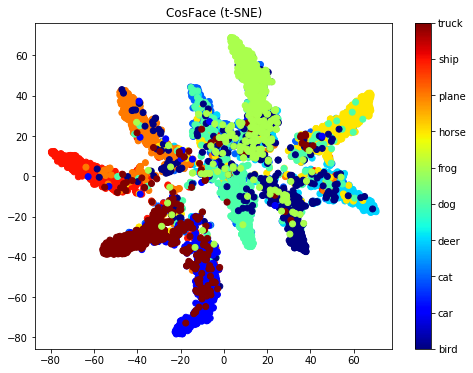

In [12]:
def learner_CosFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, AddMarginProduct, m=0.4)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_CosFace(all_data), 'CosFace (t-SNE)', all_data)

In [13]:
toytest.do_tests('CosFace', learner_CosFace, delete_models=True)


Testing CosFace for case #0


epoch,train_loss,valid_loss,accuracy,time
0,11.875466,10.789765,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.864705,10.631325,0.000000,00:01
1,10.416888,9.632615,0.100000,00:01
2,9.659492,9.122243,0.430000,00:01
3,8.159015,7.924787,0.550000,00:01
4,6.865118,7.413933,0.650000,00:01
5,5.781446,6.848568,0.685000,00:01
6,4.972824,5.917562,0.710000,00:01
7,4.305378,5.396408,0.730000,00:01
8,3.782554,5.133745,0.745000,00:01
9,3.366825,4.975839,0.735000,00:01


Better model found at epoch 0 with val_loss value: 10.631324768066406.
Better model found at epoch 1 with val_loss value: 9.632615089416504.
Better model found at epoch 2 with val_loss value: 9.12224292755127.
Better model found at epoch 3 with val_loss value: 7.9247870445251465.
Better model found at epoch 4 with val_loss value: 7.413933277130127.
Better model found at epoch 5 with val_loss value: 6.848567962646484.
Better model found at epoch 6 with val_loss value: 5.9175615310668945.
Better model found at epoch 7 with val_loss value: 5.3964080810546875.
Better model found at epoch 8 with val_loss value: 5.133744716644287.
Better model found at epoch 9 with val_loss value: 4.975839138031006.


epoch,train_loss,valid_loss,accuracy,time
0,0.489489,4.807545,0.730000,00:01
1,0.530498,4.333849,0.735000,00:01
2,0.503636,4.303832,0.740000,00:01
3,0.453265,4.167809,0.745000,00:01
4,0.412458,3.902209,0.775000,00:01
5,0.401413,3.162037,0.815000,00:01
6,0.357318,2.934708,0.830000,00:01
7,0.328498,2.842511,0.830000,00:01
8,0.325080,2.854785,0.835000,00:01
9,0.310564,2.843020,0.835000,00:01


Better model found at epoch 0 with val_loss value: 4.807544708251953.
Better model found at epoch 1 with val_loss value: 4.33384895324707.
Better model found at epoch 2 with val_loss value: 4.303832054138184.
Better model found at epoch 3 with val_loss value: 4.167809009552002.
Better model found at epoch 4 with val_loss value: 3.9022085666656494.
Better model found at epoch 5 with val_loss value: 3.162036657333374.
Better model found at epoch 6 with val_loss value: 2.9347076416015625.
Better model found at epoch 7 with val_loss value: 2.84251070022583.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #1


epoch,train_loss,valid_loss,accuracy,time
0,11.885971,10.313289,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.964988,9.788018,0.000000,00:01
1,10.716640,7.878780,0.005000,00:01
2,9.804327,4.376820,0.360000,00:01
3,8.260065,2.684123,0.690000,00:01
4,6.734257,2.236945,0.795000,00:01
5,5.561465,2.171767,0.830000,00:01
6,4.750823,2.155828,0.850000,00:01
7,4.056767,2.075421,0.850000,00:01
8,3.519322,2.100435,0.850000,00:01
9,3.082154,2.111045,0.835000,00:02


Better model found at epoch 0 with val_loss value: 9.788018226623535.
Better model found at epoch 1 with val_loss value: 7.878779888153076.
Better model found at epoch 2 with val_loss value: 4.376819610595703.
Better model found at epoch 3 with val_loss value: 2.6841232776641846.
Better model found at epoch 4 with val_loss value: 2.2369446754455566.
Better model found at epoch 5 with val_loss value: 2.171767473220825.
Better model found at epoch 6 with val_loss value: 2.155827522277832.
Better model found at epoch 7 with val_loss value: 2.0754213333129883.


epoch,train_loss,valid_loss,accuracy,time
0,0.321041,2.055707,0.855000,00:01
1,0.232972,2.087907,0.840000,00:01
2,0.225649,1.972646,0.855000,00:01
3,0.176304,1.889401,0.860000,00:01
4,0.230923,1.767770,0.860000,00:01
5,0.193551,2.036534,0.865000,00:01
6,0.198222,2.177725,0.860000,00:01
7,0.192183,2.290637,0.865000,00:02
8,0.169330,2.390479,0.860000,00:01
9,0.149807,2.326284,0.865000,00:02


Better model found at epoch 0 with val_loss value: 2.0557069778442383.
Better model found at epoch 2 with val_loss value: 1.9726459980010986.
Better model found at epoch 3 with val_loss value: 1.8894010782241821.
Better model found at epoch 4 with val_loss value: 1.7677695751190186.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #2


epoch,train_loss,valid_loss,accuracy,time
0,11.952950,9.522677,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.769471,9.349004,0.040000,00:02
1,10.369074,9.881827,0.450000,00:01
2,9.047689,14.034515,0.495000,00:01
3,7.292965,14.256138,0.520000,00:01
4,5.856068,11.852654,0.565000,00:01
5,4.892251,6.807551,0.665000,00:01
6,4.093839,3.835261,0.780000,00:01
7,3.507229,2.296580,0.850000,00:01
8,3.030527,1.733003,0.855000,00:01
9,2.652903,1.593982,0.880000,00:01


Better model found at epoch 0 with val_loss value: 9.349003791809082.
Better model found at epoch 5 with val_loss value: 6.807551383972168.
Better model found at epoch 6 with val_loss value: 3.8352606296539307.
Better model found at epoch 7 with val_loss value: 2.296579599380493.
Better model found at epoch 8 with val_loss value: 1.733002781867981.
Better model found at epoch 9 with val_loss value: 1.5939817428588867.


epoch,train_loss,valid_loss,accuracy,time
0,0.310835,1.691424,0.890000,00:01
1,0.181857,1.877055,0.875000,00:01
2,0.173857,2.036329,0.870000,00:01
3,0.135609,2.221526,0.850000,00:01
4,0.165465,2.312535,0.855000,00:01
5,0.217584,2.439292,0.870000,00:01
6,0.198889,2.432775,0.870000,00:01
7,0.186753,2.389287,0.865000,00:01
8,0.174435,2.275720,0.870000,00:01
9,0.156992,2.251824,0.875000,00:01


Better model found at epoch 0 with val_loss value: 1.6914243698120117.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #3


epoch,train_loss,valid_loss,accuracy,time
0,12.143535,10.888576,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,11.242675,10.426605,0.000000,00:01
1,10.985369,9.103558,0.030000,00:01
2,9.838806,8.266955,0.460000,00:01
3,8.343445,6.136221,0.650000,00:01
4,6.881018,3.234648,0.800000,00:01
5,5.780124,2.136849,0.865000,00:01
6,4.910121,2.039377,0.850000,00:01
7,4.326417,2.443214,0.845000,00:02
8,3.761079,2.649670,0.845000,00:01
9,3.302496,2.853065,0.830000,00:01


Better model found at epoch 0 with val_loss value: 10.426605224609375.
Better model found at epoch 1 with val_loss value: 9.103557586669922.
Better model found at epoch 2 with val_loss value: 8.266955375671387.
Better model found at epoch 3 with val_loss value: 6.136221408843994.
Better model found at epoch 4 with val_loss value: 3.234647750854492.
Better model found at epoch 5 with val_loss value: 2.1368486881256104.
Better model found at epoch 6 with val_loss value: 2.039377212524414.


epoch,train_loss,valid_loss,accuracy,time
0,0.338433,2.306386,0.840000,00:01
1,0.376142,2.728369,0.850000,00:01
2,0.571499,2.974257,0.845000,00:01
3,0.540665,3.460335,0.840000,00:01
4,0.471242,3.696088,0.835000,00:01
5,0.391313,3.754451,0.830000,00:01
6,0.333596,3.509752,0.820000,00:01
7,0.307511,3.343802,0.825000,00:01
8,0.284046,3.206827,0.835000,00:02
9,0.256387,3.154851,0.840000,00:01


Better model found at epoch 0 with val_loss value: 2.3063864707946777.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #4


epoch,train_loss,valid_loss,accuracy,time
0,11.955622,9.705599,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,11.372280,9.981333,0.080000,00:01
1,10.675089,11.508444,0.455000,00:01
2,9.536601,15.397907,0.505000,00:01
3,7.923186,15.979093,0.520000,00:01
4,6.586767,15.053086,0.545000,00:01
5,5.454602,13.430822,0.570000,00:01
6,4.669972,10.236390,0.630000,00:01
7,4.003250,7.879112,0.655000,00:01
8,3.541480,6.147198,0.680000,00:01
9,3.142854,4.957028,0.730000,00:01


Better model found at epoch 0 with val_loss value: 9.981332778930664.
Better model found at epoch 7 with val_loss value: 7.8791117668151855.
Better model found at epoch 8 with val_loss value: 6.147197723388672.
Better model found at epoch 9 with val_loss value: 4.957028388977051.


epoch,train_loss,valid_loss,accuracy,time
0,0.582117,4.278051,0.735000,00:01
1,0.525010,3.703146,0.750000,00:01
2,0.434195,3.483357,0.765000,00:01
3,0.360436,3.650417,0.790000,00:01
4,0.367397,3.754900,0.775000,00:01
5,0.345047,4.030614,0.775000,00:01
6,0.305135,4.084138,0.770000,00:01
7,0.280919,3.965373,0.775000,00:01
8,0.289561,3.861956,0.760000,00:01
9,0.262266,3.738946,0.760000,00:01


Better model found at epoch 0 with val_loss value: 4.278051376342773.
Better model found at epoch 1 with val_loss value: 3.7031455039978027.
Better model found at epoch 2 with val_loss value: 3.4833571910858154.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #5


epoch,train_loss,valid_loss,accuracy,time
0,11.690753,10.396013,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,11.198940,10.446307,0.000000,00:01
1,10.890170,10.510590,0.345000,00:01
2,10.135409,11.500697,0.500000,00:01
3,8.801200,10.275074,0.555000,00:02
4,7.511513,9.438704,0.605000,00:01
5,6.391335,9.013498,0.625000,00:01
6,5.531690,8.622922,0.630000,00:02
7,4.806192,7.602053,0.610000,00:01
8,4.228963,6.906691,0.610000,00:01
9,3.741224,6.797466,0.610000,00:01


Better model found at epoch 0 with val_loss value: 10.446307182312012.
Better model found at epoch 3 with val_loss value: 10.275074005126953.
Better model found at epoch 4 with val_loss value: 9.438704490661621.
Better model found at epoch 5 with val_loss value: 9.013498306274414.
Better model found at epoch 6 with val_loss value: 8.62292194366455.
Better model found at epoch 7 with val_loss value: 7.602053165435791.
Better model found at epoch 8 with val_loss value: 6.906691074371338.
Better model found at epoch 9 with val_loss value: 6.797466278076172.


epoch,train_loss,valid_loss,accuracy,time
0,0.703117,6.495609,0.615000,00:01
1,0.529928,6.277411,0.625000,00:01
2,0.472718,6.256019,0.645000,00:01
3,0.435623,6.305005,0.655000,00:01
4,0.395470,6.261874,0.690000,00:01
5,0.347252,6.234041,0.695000,00:01
6,0.296255,6.214680,0.695000,00:01
7,0.273141,6.155774,0.690000,00:01
8,0.268709,6.079339,0.685000,00:01
9,0.256392,6.059352,0.690000,00:01


Better model found at epoch 0 with val_loss value: 6.495609283447266.
Better model found at epoch 1 with val_loss value: 6.277410984039307.
Better model found at epoch 2 with val_loss value: 6.256019115447998.
Better model found at epoch 5 with val_loss value: 6.234041213989258.
Better model found at epoch 6 with val_loss value: 6.214679718017578.
Better model found at epoch 7 with val_loss value: 6.155774116516113.
Better model found at epoch 8 with val_loss value: 6.079339027404785.
Better model found at epoch 9 with val_loss value: 6.059351921081543.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #6


epoch,train_loss,valid_loss,accuracy,time
0,11.943188,10.970360,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.998319,10.931077,0.000000,00:01
1,10.532753,11.749378,0.335000,00:01
2,9.340436,14.950556,0.470000,00:01
3,7.777443,16.319305,0.490000,00:01
4,6.400931,15.154920,0.500000,00:01
5,5.343771,12.822249,0.510000,00:01
6,4.580707,9.898584,0.535000,00:01
7,3.945549,8.023940,0.600000,00:01
8,3.450565,7.175377,0.630000,00:01
9,3.042616,6.599857,0.660000,00:01


Better model found at epoch 0 with val_loss value: 10.931077003479004.
Better model found at epoch 6 with val_loss value: 9.898584365844727.
Better model found at epoch 7 with val_loss value: 8.023940086364746.
Better model found at epoch 8 with val_loss value: 7.175377368927002.
Better model found at epoch 9 with val_loss value: 6.599857330322266.


epoch,train_loss,valid_loss,accuracy,time
0,0.194582,6.179832,0.680000,00:01
1,0.422654,5.443950,0.705000,00:01
2,0.326837,5.001291,0.725000,00:01
3,0.262843,4.757288,0.725000,00:01
4,0.261116,4.815370,0.730000,00:01
5,0.232065,4.798955,0.740000,00:01
6,0.237334,4.753388,0.735000,00:01
7,0.215634,4.807516,0.725000,00:01
8,0.215349,4.838251,0.720000,00:01
9,0.191214,4.842070,0.710000,00:01


Better model found at epoch 0 with val_loss value: 6.179831504821777.
Better model found at epoch 1 with val_loss value: 5.443950176239014.
Better model found at epoch 2 with val_loss value: 5.001291275024414.
Better model found at epoch 3 with val_loss value: 4.757287979125977.
Better model found at epoch 6 with val_loss value: 4.753387928009033.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #7


epoch,train_loss,valid_loss,accuracy,time
0,11.702365,10.318674,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,10.953128,10.116886,0.000000,00:01
1,10.564254,8.968119,0.075000,00:01
2,9.529227,7.077273,0.385000,00:01
3,7.927354,4.934367,0.670000,00:01
4,6.585289,4.441727,0.780000,00:02
5,5.510416,4.763054,0.755000,00:01
6,4.738898,5.083186,0.735000,00:01
7,4.055892,5.056114,0.740000,00:01
8,3.544458,4.761493,0.750000,00:01
9,3.122151,4.419931,0.755000,00:01


Better model found at epoch 0 with val_loss value: 10.116886138916016.
Better model found at epoch 1 with val_loss value: 8.968118667602539.
Better model found at epoch 2 with val_loss value: 7.077272891998291.
Better model found at epoch 3 with val_loss value: 4.934366703033447.
Better model found at epoch 4 with val_loss value: 4.4417266845703125.
Better model found at epoch 9 with val_loss value: 4.419930934906006.


epoch,train_loss,valid_loss,accuracy,time
0,0.302669,4.149646,0.750000,00:01
1,0.409057,3.919263,0.750000,00:01
2,0.285752,3.747086,0.790000,00:01
3,0.261389,3.526111,0.805000,00:01
4,0.255582,3.071283,0.820000,00:01
5,0.349017,2.830505,0.855000,00:01
6,0.301663,2.777048,0.860000,00:01
7,0.258765,2.776066,0.855000,00:01
8,0.236585,2.814114,0.850000,00:01
9,0.209224,2.826823,0.850000,00:01


Better model found at epoch 0 with val_loss value: 4.149645805358887.
Better model found at epoch 1 with val_loss value: 3.919262647628784.
Better model found at epoch 2 with val_loss value: 3.7470862865448.
Better model found at epoch 3 with val_loss value: 3.526110887527466.
Better model found at epoch 4 with val_loss value: 3.0712833404541016.
Better model found at epoch 5 with val_loss value: 2.830505132675171.
Better model found at epoch 6 with val_loss value: 2.777047634124756.
Better model found at epoch 7 with val_loss value: 2.7760660648345947.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #8


epoch,train_loss,valid_loss,accuracy,time
0,11.549117,10.797961,0.000000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,10.665192,10.397938,0.000000,00:02
1,10.380747,8.734173,0.020000,00:01
2,9.173014,5.571002,0.425000,00:01
3,7.517109,3.587934,0.700000,00:01
4,6.131378,2.706319,0.800000,00:01
5,5.115123,2.261413,0.845000,00:01
6,4.317148,2.006397,0.865000,00:02
7,3.707416,1.837017,0.870000,00:01
8,3.218225,1.782369,0.885000,00:01
9,2.844551,1.796646,0.870000,00:01


Better model found at epoch 0 with val_loss value: 10.397937774658203.
Better model found at epoch 1 with val_loss value: 8.734172821044922.
Better model found at epoch 2 with val_loss value: 5.5710015296936035.
Better model found at epoch 3 with val_loss value: 3.5879340171813965.
Better model found at epoch 4 with val_loss value: 2.7063193321228027.
Better model found at epoch 5 with val_loss value: 2.2614128589630127.
Better model found at epoch 6 with val_loss value: 2.006397008895874.
Better model found at epoch 7 with val_loss value: 1.8370167016983032.
Better model found at epoch 8 with val_loss value: 1.7823693752288818.


epoch,train_loss,valid_loss,accuracy,time
0,0.495878,1.806258,0.875000,00:01
1,0.390465,1.847989,0.875000,00:01
2,0.410521,1.992577,0.885000,00:01
3,0.355787,1.940864,0.885000,00:01
4,0.310892,1.696246,0.890000,00:02
5,0.270830,1.657673,0.895000,00:02
6,0.246260,1.636502,0.895000,00:01
7,0.226460,1.656191,0.900000,00:01
8,0.206211,1.679882,0.890000,00:01
9,0.201596,1.698131,0.880000,00:01


Better model found at epoch 0 with val_loss value: 1.8062584400177002.
Better model found at epoch 4 with val_loss value: 1.6962463855743408.
Better model found at epoch 5 with val_loss value: 1.6576733589172363.
Better model found at epoch 6 with val_loss value: 1.6365019083023071.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CosFace for case #9


epoch,train_loss,valid_loss,accuracy,time
0,11.906390,11.320216,0.000000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,11.422855,11.162061,0.000000,00:01
1,11.111750,11.062344,0.110000,00:01
2,10.244610,13.420832,0.455000,00:01
3,8.931305,13.771933,0.465000,00:01
4,7.383887,11.737274,0.505000,00:01
5,6.122256,9.822601,0.515000,00:01
6,5.195547,8.145511,0.545000,00:01
7,4.462166,7.500594,0.595000,00:01
8,3.945020,7.292001,0.580000,00:01
9,3.543120,7.165145,0.600000,00:01


Better model found at epoch 0 with val_loss value: 11.162060737609863.
Better model found at epoch 1 with val_loss value: 11.06234359741211.
Better model found at epoch 5 with val_loss value: 9.822601318359375.
Better model found at epoch 6 with val_loss value: 8.14551067352295.
Better model found at epoch 7 with val_loss value: 7.500593662261963.
Better model found at epoch 8 with val_loss value: 7.292000770568848.
Better model found at epoch 9 with val_loss value: 7.165145397186279.


epoch,train_loss,valid_loss,accuracy,time
0,0.398317,7.086801,0.605000,00:01
1,0.350098,6.988667,0.650000,00:01
2,0.305629,6.988039,0.665000,00:01
3,0.291687,6.865993,0.665000,00:01
4,0.295058,6.874854,0.665000,00:01
5,0.277012,6.890527,0.650000,00:01
6,0.255515,6.855842,0.645000,00:01
7,0.246396,6.872633,0.655000,00:01
8,0.220745,6.805267,0.655000,00:01
9,0.215805,6.773531,0.665000,00:01


Better model found at epoch 0 with val_loss value: 7.086801052093506.
Better model found at epoch 1 with val_loss value: 6.988667011260986.
Better model found at epoch 2 with val_loss value: 6.988038539886475.
Better model found at epoch 3 with val_loss value: 6.865993022918701.
Better model found at epoch 6 with val_loss value: 6.855841636657715.
Better model found at epoch 8 with val_loss value: 6.805266857147217.
Better model found at epoch 9 with val_loss value: 6.773530960083008.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


## 5. SphereFace

- W. Liu, Y. Wen, Z. Yu, M. Li, B. Raj, and L. Song. SphereFace: Deep Hypersphere Embedding for Face Recognition. In CVPR, 2017. https://arxiv.org/pdf/1704.08063.pdf
- Pytorch implementation: https://github.com/ronghuaiyang/arcface-pytorch

epoch,train_loss,valid_loss,accuracy,time
0,2.437515,2.103913,0.266667,00:02


epoch,train_loss,valid_loss,accuracy,time
0,2.352600,2.129199,0.200000,00:02
1,2.229454,2.068239,0.304167,00:02
2,2.014709,1.928580,0.437500,00:02
3,1.747444,1.719232,0.475000,00:02
4,1.459966,1.612520,0.514583,00:02
5,1.232127,1.649010,0.535417,00:02
6,1.005219,1.648285,0.564583,00:02
7,0.814216,1.705022,0.547917,00:02
8,0.669057,1.718252,0.545833,00:02
9,0.612349,1.800378,0.558333,00:02


Better model found at epoch 0 with val_loss value: 2.1291990280151367.
Better model found at epoch 1 with val_loss value: 2.0682389736175537.
Better model found at epoch 2 with val_loss value: 1.9285796880722046.
Better model found at epoch 3 with val_loss value: 1.719232439994812.
Better model found at epoch 4 with val_loss value: 1.6125198602676392.


epoch,train_loss,valid_loss,accuracy,time
0,1.176213,1.914095,0.506250,00:02
1,1.106026,1.974220,0.522917,00:02
2,1.058054,2.160853,0.533333,00:02
3,1.033619,2.246186,0.518750,00:02
4,0.919210,1.891672,0.579167,00:02
5,0.764522,1.940551,0.589583,00:02
6,0.592736,1.909267,0.597917,00:02
7,0.495214,1.999725,0.602083,00:02
8,0.419715,1.981619,0.610417,00:02
9,0.356449,1.996613,0.602083,00:02


Better model found at epoch 0 with val_loss value: 1.914095163345337.
Better model found at epoch 4 with val_loss value: 1.8916720151901245.


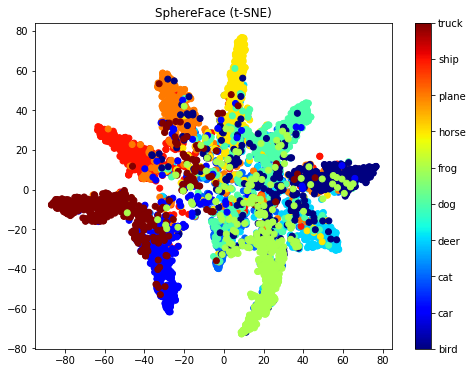

In [14]:
def learner_SphereFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, SphereProduct, m=int(4))
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_SphereFace(all_data), 'SphereFace (t-SNE)', all_data)

In [15]:
toytest.do_tests('ShpereFace', learner_SphereFace, delete_models=True)


Testing ShpereFace for case #0


epoch,train_loss,valid_loss,accuracy,time
0,0.724661,0.614361,0.785000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.666679,0.613895,0.705000,00:01
1,0.619141,0.619339,0.600000,00:01
2,0.598495,0.707374,0.565000,00:01
3,0.518145,0.674074,0.625000,00:01
4,0.464006,0.664903,0.685000,00:01
5,0.406966,0.653987,0.725000,00:01
6,0.351502,0.578633,0.755000,00:01
7,0.310252,0.477329,0.795000,00:01
8,0.277391,0.429144,0.810000,00:01
9,0.252707,0.409512,0.820000,00:01


Better model found at epoch 0 with val_loss value: 0.6138952374458313.
Better model found at epoch 6 with val_loss value: 0.5786325335502625.
Better model found at epoch 7 with val_loss value: 0.4773288667201996.
Better model found at epoch 8 with val_loss value: 0.4291442036628723.
Better model found at epoch 9 with val_loss value: 0.40951186418533325.


epoch,train_loss,valid_loss,accuracy,time
0,0.081973,0.411304,0.830000,00:01
1,0.076640,0.425608,0.815000,00:01
2,0.062954,0.462004,0.830000,00:01
3,0.054490,0.471504,0.840000,00:01
4,0.055485,0.496203,0.845000,00:01
5,0.046977,0.513866,0.820000,00:01
6,0.042271,0.521067,0.820000,00:01
7,0.036741,0.519188,0.820000,00:01
8,0.035490,0.519772,0.825000,00:01
9,0.033169,0.524804,0.815000,00:01


Better model found at epoch 0 with val_loss value: 0.4113035202026367.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #1


epoch,train_loss,valid_loss,accuracy,time
0,0.842598,0.619771,0.630000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.671139,0.624176,0.620000,00:01
1,0.610400,0.526791,0.770000,00:01
2,0.524454,0.497359,0.730000,00:01
3,0.454250,0.620727,0.700000,00:01
4,0.386785,0.499939,0.765000,00:01
5,0.324362,0.412213,0.810000,00:01
6,0.286613,0.320419,0.875000,00:01
7,0.247812,0.282787,0.885000,00:01
8,0.217117,0.255081,0.875000,00:01
9,0.196406,0.246694,0.890000,00:02


Better model found at epoch 0 with val_loss value: 0.6241756081581116.
Better model found at epoch 1 with val_loss value: 0.5267906785011292.
Better model found at epoch 2 with val_loss value: 0.49735918641090393.
Better model found at epoch 5 with val_loss value: 0.41221341490745544.
Better model found at epoch 6 with val_loss value: 0.32041871547698975.
Better model found at epoch 7 with val_loss value: 0.28278660774230957.
Better model found at epoch 8 with val_loss value: 0.25508052110671997.
Better model found at epoch 9 with val_loss value: 0.2466941773891449.


epoch,train_loss,valid_loss,accuracy,time
0,0.027804,0.241601,0.885000,00:01
1,0.045387,0.229308,0.910000,00:01
2,0.035135,0.220153,0.920000,00:01
3,0.029249,0.224153,0.910000,00:02
4,0.027917,0.226214,0.905000,00:01
5,0.023613,0.229886,0.900000,00:01
6,0.023837,0.224766,0.900000,00:01
7,0.021756,0.224089,0.905000,00:01
8,0.019696,0.224127,0.900000,00:01
9,0.026264,0.220068,0.905000,00:01


Better model found at epoch 0 with val_loss value: 0.24160072207450867.
Better model found at epoch 1 with val_loss value: 0.22930820286273956.
Better model found at epoch 2 with val_loss value: 0.22015279531478882.
Better model found at epoch 9 with val_loss value: 0.22006838023662567.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #2


epoch,train_loss,valid_loss,accuracy,time
0,0.814386,0.604816,0.635000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.694736,0.594582,0.635000,00:01
1,0.662162,0.510322,0.745000,00:01
2,0.572609,0.495334,0.730000,00:01
3,0.494283,0.566684,0.740000,00:01
4,0.421639,0.506231,0.760000,00:01
5,0.350948,0.386811,0.820000,00:01
6,0.299626,0.273685,0.885000,00:01
7,0.268838,0.199934,0.920000,00:01
8,0.243663,0.180174,0.940000,00:01
9,0.219417,0.182882,0.935000,00:01


Better model found at epoch 0 with val_loss value: 0.5945822596549988.
Better model found at epoch 1 with val_loss value: 0.5103216171264648.
Better model found at epoch 2 with val_loss value: 0.49533435702323914.
Better model found at epoch 5 with val_loss value: 0.3868105709552765.
Better model found at epoch 6 with val_loss value: 0.2736852765083313.
Better model found at epoch 7 with val_loss value: 0.19993415474891663.
Better model found at epoch 8 with val_loss value: 0.18017354607582092.


epoch,train_loss,valid_loss,accuracy,time
0,0.067486,0.185510,0.935000,00:01
1,0.053045,0.185601,0.945000,00:01
2,0.042949,0.180394,0.930000,00:01
3,0.034656,0.182794,0.930000,00:01
4,0.028645,0.188518,0.930000,00:01
5,0.024641,0.197065,0.930000,00:01
6,0.023631,0.201409,0.935000,00:01
7,0.020958,0.215831,0.940000,00:01
8,0.018472,0.222022,0.940000,00:01
9,0.018632,0.237830,0.930000,00:01


Better model found at epoch 0 with val_loss value: 0.1855102926492691.
Better model found at epoch 2 with val_loss value: 0.180393785238266.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #3


epoch,train_loss,valid_loss,accuracy,time
0,0.860355,0.619001,0.675000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.678432,0.613460,0.680000,00:01
1,0.682255,0.568113,0.705000,00:01
2,0.611562,0.480760,0.765000,00:01
3,0.522846,0.378747,0.840000,00:01
4,0.451180,0.311736,0.870000,00:01
5,0.384341,0.273938,0.885000,00:01
6,0.331733,0.257450,0.885000,00:01
7,0.293061,0.279727,0.885000,00:01
8,0.260563,0.312924,0.885000,00:01
9,0.235891,0.351486,0.875000,00:01


Better model found at epoch 0 with val_loss value: 0.6134602427482605.
Better model found at epoch 1 with val_loss value: 0.5681126713752747.
Better model found at epoch 2 with val_loss value: 0.48076021671295166.
Better model found at epoch 3 with val_loss value: 0.3787466883659363.
Better model found at epoch 4 with val_loss value: 0.31173571944236755.
Better model found at epoch 5 with val_loss value: 0.27393838763237.
Better model found at epoch 6 with val_loss value: 0.2574498653411865.


epoch,train_loss,valid_loss,accuracy,time
0,0.125894,0.291272,0.885000,00:01
1,0.088025,0.325329,0.875000,00:01
2,0.078047,0.367833,0.875000,00:01
3,0.065787,0.461461,0.855000,00:01
4,0.054954,0.556091,0.845000,00:01
5,0.054393,0.638868,0.865000,00:01
6,0.047804,0.702732,0.840000,00:01
7,0.043925,0.748477,0.835000,00:01
8,0.040507,0.794716,0.825000,00:01
9,0.036116,0.796085,0.820000,00:01


Better model found at epoch 0 with val_loss value: 0.2912721335887909.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #4


epoch,train_loss,valid_loss,accuracy,time
0,0.862361,0.626883,0.615000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.608376,0.659532,0.535000,00:01
1,0.601385,0.684676,0.545000,00:01
2,0.542906,0.838110,0.550000,00:01
3,0.475560,1.152256,0.570000,00:01
4,0.409716,1.322952,0.595000,00:01
5,0.345687,1.206104,0.635000,00:01
6,0.297853,1.054405,0.690000,00:01
7,0.266568,0.858398,0.710000,00:01
8,0.240117,0.691638,0.750000,00:01
9,0.217628,0.582963,0.785000,00:01


Better model found at epoch 0 with val_loss value: 0.6595322489738464.
Better model found at epoch 9 with val_loss value: 0.5829625725746155.


epoch,train_loss,valid_loss,accuracy,time
0,0.085088,0.514413,0.810000,00:01
1,0.062323,0.466694,0.845000,00:01
2,0.056240,0.439860,0.850000,00:01
3,0.047469,0.433375,0.855000,00:01
4,0.047088,0.430057,0.850000,00:01
5,0.044863,0.392176,0.865000,00:01
6,0.042778,0.396124,0.855000,00:01
7,0.038746,0.414416,0.850000,00:01
8,0.034810,0.432035,0.855000,00:01
9,0.033483,0.441766,0.850000,00:01


Better model found at epoch 0 with val_loss value: 0.5144134163856506.
Better model found at epoch 1 with val_loss value: 0.46669384837150574.
Better model found at epoch 2 with val_loss value: 0.4398595690727234.
Better model found at epoch 3 with val_loss value: 0.43337520956993103.
Better model found at epoch 4 with val_loss value: 0.4300574064254761.
Better model found at epoch 5 with val_loss value: 0.39217609167099.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #5


epoch,train_loss,valid_loss,accuracy,time
0,0.940326,0.642663,0.665000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.786140,0.655711,0.560000,00:01
1,0.742225,0.660164,0.565000,00:01
2,0.668076,0.777810,0.570000,00:01
3,0.608786,1.006385,0.575000,00:01
4,0.544744,0.966585,0.610000,00:01
5,0.482270,0.808334,0.665000,00:01
6,0.419247,0.694593,0.710000,00:01
7,0.375734,0.609288,0.750000,00:01
8,0.336479,0.556287,0.780000,00:02
9,0.307880,0.526157,0.785000,00:01


Better model found at epoch 0 with val_loss value: 0.6557105779647827.
Better model found at epoch 7 with val_loss value: 0.6092883348464966.
Better model found at epoch 8 with val_loss value: 0.556286633014679.
Better model found at epoch 9 with val_loss value: 0.5261568427085876.


epoch,train_loss,valid_loss,accuracy,time
0,0.096829,0.500337,0.800000,00:01
1,0.082665,0.500911,0.805000,00:01
2,0.080219,0.539778,0.785000,00:01
3,0.066484,0.599313,0.780000,00:01
4,0.054862,0.592944,0.795000,00:01
5,0.055815,0.558811,0.800000,00:01
6,0.051639,0.563274,0.815000,00:01
7,0.048644,0.554268,0.815000,00:01
8,0.046011,0.537135,0.820000,00:01
9,0.047600,0.538506,0.815000,00:01


Better model found at epoch 0 with val_loss value: 0.5003369450569153.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #6


epoch,train_loss,valid_loss,accuracy,time
0,0.803066,0.672543,0.565000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.613346,0.690892,0.530000,00:01
1,0.606853,0.674877,0.570000,00:01
2,0.568457,0.758003,0.520000,00:01
3,0.494801,1.034198,0.545000,00:01
4,0.414511,1.136387,0.585000,00:01
5,0.358420,0.893844,0.665000,00:01
6,0.307573,0.756028,0.710000,00:01
7,0.266875,0.681466,0.755000,00:01
8,0.232724,0.687096,0.760000,00:01
9,0.207867,0.695664,0.755000,00:01


Better model found at epoch 0 with val_loss value: 0.6908924579620361.
Better model found at epoch 1 with val_loss value: 0.6748765707015991.


epoch,train_loss,valid_loss,accuracy,time
0,0.707089,0.724876,0.500000,00:01
1,0.656930,0.798936,0.505000,00:02
2,0.582571,1.113645,0.530000,00:02
3,0.479900,1.224590,0.575000,00:01
4,0.392066,1.035842,0.660000,00:01
5,0.332373,0.899020,0.735000,00:01
6,0.286075,0.803140,0.775000,00:01
7,0.249246,0.767580,0.780000,00:01
8,0.221869,0.763438,0.765000,00:01
9,0.198583,0.759134,0.745000,00:01


Better model found at epoch 0 with val_loss value: 0.7248760461807251.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #7


epoch,train_loss,valid_loss,accuracy,time
0,0.795687,0.630212,0.720000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.632702,0.627719,0.710000,00:01
1,0.598389,0.573543,0.770000,00:01
2,0.553492,0.486547,0.795000,00:01
3,0.456709,0.483534,0.755000,00:01
4,0.384339,0.502295,0.805000,00:01
5,0.332818,0.521950,0.820000,00:01
6,0.283422,0.521202,0.825000,00:01
7,0.251369,0.498478,0.840000,00:01
8,0.221047,0.487035,0.865000,00:01
9,0.199187,0.467254,0.865000,00:01


Better model found at epoch 0 with val_loss value: 0.6277189254760742.
Better model found at epoch 1 with val_loss value: 0.5735434889793396.
Better model found at epoch 2 with val_loss value: 0.4865473210811615.
Better model found at epoch 3 with val_loss value: 0.4835341274738312.
Better model found at epoch 9 with val_loss value: 0.46725350618362427.


epoch,train_loss,valid_loss,accuracy,time
0,0.058258,0.461092,0.875000,00:01
1,0.041991,0.457198,0.880000,00:01
2,0.036097,0.436177,0.885000,00:01
3,0.038864,0.396063,0.895000,00:01
4,0.034745,0.383294,0.900000,00:01
5,0.030535,0.385243,0.895000,00:01
6,0.027461,0.377079,0.890000,00:01
7,0.026676,0.371289,0.900000,00:01
8,0.024726,0.365472,0.900000,00:01
9,0.024911,0.370179,0.900000,00:01


Better model found at epoch 0 with val_loss value: 0.461092084646225.
Better model found at epoch 1 with val_loss value: 0.45719796419143677.
Better model found at epoch 2 with val_loss value: 0.43617716431617737.
Better model found at epoch 3 with val_loss value: 0.39606326818466187.
Better model found at epoch 4 with val_loss value: 0.383294016122818.
Better model found at epoch 6 with val_loss value: 0.3770785629749298.
Better model found at epoch 7 with val_loss value: 0.37128886580467224.
Better model found at epoch 8 with val_loss value: 0.3654716908931732.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #8


epoch,train_loss,valid_loss,accuracy,time
0,0.859586,0.641401,0.720000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.700028,0.641410,0.720000,00:01
1,0.633674,0.614808,0.695000,00:01
2,0.562912,0.535101,0.755000,00:01
3,0.484176,0.498583,0.715000,00:01
4,0.430688,0.491800,0.735000,00:01
5,0.369224,0.442508,0.780000,00:01
6,0.312537,0.415564,0.810000,00:01
7,0.278683,0.378603,0.840000,00:01
8,0.246427,0.341996,0.875000,00:01
9,0.220643,0.323049,0.880000,00:01


Better model found at epoch 0 with val_loss value: 0.6414102911949158.
Better model found at epoch 1 with val_loss value: 0.6148079037666321.
Better model found at epoch 2 with val_loss value: 0.5351014733314514.
Better model found at epoch 3 with val_loss value: 0.49858319759368896.
Better model found at epoch 4 with val_loss value: 0.4918001890182495.
Better model found at epoch 5 with val_loss value: 0.4425075054168701.
Better model found at epoch 6 with val_loss value: 0.4155641198158264.
Better model found at epoch 7 with val_loss value: 0.3786025941371918.
Better model found at epoch 8 with val_loss value: 0.341996431350708.
Better model found at epoch 9 with val_loss value: 0.32304900884628296.


epoch,train_loss,valid_loss,accuracy,time
0,0.050274,0.306924,0.885000,00:01
1,0.039093,0.293371,0.885000,00:01
2,0.038959,0.292984,0.895000,00:01
3,0.037144,0.290961,0.900000,00:01
4,0.032182,0.281318,0.890000,00:01
5,0.031429,0.275254,0.905000,00:01
6,0.033682,0.277677,0.905000,00:01
7,0.029175,0.290379,0.905000,00:01
8,0.028165,0.289169,0.900000,00:01
9,0.028586,0.287704,0.910000,00:01


Better model found at epoch 0 with val_loss value: 0.30692440271377563.
Better model found at epoch 1 with val_loss value: 0.2933710217475891.
Better model found at epoch 2 with val_loss value: 0.2929844260215759.
Better model found at epoch 3 with val_loss value: 0.29096072912216187.
Better model found at epoch 4 with val_loss value: 0.28131839632987976.
Better model found at epoch 5 with val_loss value: 0.275254487991333.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing ShpereFace for case #9


epoch,train_loss,valid_loss,accuracy,time
0,0.855173,0.693785,0.530000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.713796,0.701814,0.520000,00:01
1,0.708536,0.717512,0.500000,00:01
2,0.658584,0.711229,0.510000,00:01
3,0.590296,0.774805,0.545000,00:01
4,0.504637,0.805220,0.625000,00:01
5,0.431376,0.864070,0.660000,00:01
6,0.377101,0.904830,0.690000,00:01
7,0.336590,0.877462,0.690000,00:01
8,0.301052,0.849398,0.690000,00:01
9,0.281584,0.826081,0.700000,00:01


Better model found at epoch 0 with val_loss value: 0.7018139362335205.


epoch,train_loss,valid_loss,accuracy,time
0,0.883909,0.771164,0.475000,00:01
1,0.821964,0.775875,0.465000,00:02
2,0.777013,0.756234,0.505000,00:01
3,0.686709,0.856057,0.560000,00:02
4,0.574714,0.997599,0.590000,00:01
5,0.493655,1.038204,0.655000,00:01
6,0.431402,1.046588,0.710000,00:01
7,0.372954,1.050930,0.710000,00:01
8,0.340781,1.039750,0.700000,00:01
9,0.308722,1.010554,0.705000,00:01


Better model found at epoch 0 with val_loss value: 0.7711638808250427.
Better model found at epoch 2 with val_loss value: 0.7562335729598999.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


## 6. Center Loss

- Y. Wen, K. Zhang, Z. Li, and Y. Qiao, A discriminative feature learning approach for deep face recognition,” in European Conference on Computer Vision. Springer, 2016, pp. 499–515. https://ydwen.github.io/papers/WenECCV16.pdf
- Pytorch implementation: https://github.com/KaiyangZhou/pytorch-center-loss

In [16]:
try:
    from center_loss import *
except:
    ! wget https://raw.githubusercontent.com/KaiyangZhou/pytorch-center-loss/master/center_loss.py
    from center_loss import *

epoch,train_loss,valid_loss,accuracy,time
0,5.109189,3.560745,0.177083,00:02


epoch,train_loss,valid_loss,accuracy,time
0,4.551375,3.578944,0.214583,00:02
1,4.213263,3.426070,0.245833,00:02
2,3.871726,3.254831,0.312500,00:02
3,3.518722,3.054028,0.381250,00:02
4,3.196236,2.949603,0.404167,00:02
5,2.923285,2.847263,0.437500,00:02
6,2.709405,2.824031,0.475000,00:02
7,2.549980,2.796299,0.489583,00:02
8,2.432486,2.785712,0.493750,00:02
9,2.351264,2.774135,0.477083,00:02


Better model found at epoch 0 with val_loss value: 3.578943967819214.
Better model found at epoch 1 with val_loss value: 3.426069974899292.
Better model found at epoch 2 with val_loss value: 3.254830837249756.
Better model found at epoch 3 with val_loss value: 3.054028272628784.
Better model found at epoch 4 with val_loss value: 2.949603319168091.
Better model found at epoch 5 with val_loss value: 2.8472633361816406.
Better model found at epoch 6 with val_loss value: 2.824031114578247.
Better model found at epoch 7 with val_loss value: 2.7962985038757324.
Better model found at epoch 8 with val_loss value: 2.7857117652893066.
Better model found at epoch 9 with val_loss value: 2.774134635925293.


epoch,train_loss,valid_loss,accuracy,time
0,2.241783,2.752463,0.506250,00:02
1,2.224279,2.874277,0.472917,00:02
2,2.228344,2.809957,0.525000,00:02
3,2.209409,2.781798,0.533333,00:02
4,2.139272,2.831661,0.529167,00:02
5,2.053094,2.699656,0.589583,00:02
6,1.978193,2.670657,0.597917,00:02
7,1.894089,2.671160,0.591667,00:02
8,1.839525,2.655399,0.585417,00:02
9,1.800933,2.649456,0.585417,00:02


Better model found at epoch 0 with val_loss value: 2.7524633407592773.
Better model found at epoch 5 with val_loss value: 2.699655771255493.
Better model found at epoch 6 with val_loss value: 2.6706573963165283.
Better model found at epoch 8 with val_loss value: 2.6553990840911865.
Better model found at epoch 9 with val_loss value: 2.649456262588501.


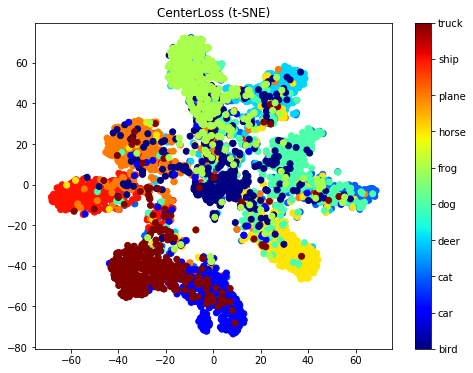

In [17]:
class WrapCenterLoss(nn.Module):
    "CenterLoss wrapper for https://github.com/KaiyangZhou/pytorch-center-loss."
    
    def __init__(self, learn, data, weight_cent=1/10):
        super().__init__()
        self.org_loss = learn.loss_func
        self.center_loss = CenterLoss(data.c, data.c)
        self.weight_cent = weight_cent

    def forward(self, output, target):
        dL = self.org_loss(output, target)
        dC = self.center_loss(output, target)
        #print(dL, dC)
        d = dL + self.weight_cent * dC
        return d

def learner_CenterLoss(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.loss_func = WrapCenterLoss(learn, train_data, weight_cent=1/8) ## Hand tuned
    learn.fit_one_cycle(1)
    learn.unfreeze()
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

if VISUALIZE_EMBEDDINGS:
    visualize_learner_embeddings(learner_CenterLoss(all_data), 'CenterLoss (t-SNE)', all_data)

In [18]:
toytest.do_tests('CenterLoss', learner_CenterLoss, delete_models=True)


Testing CenterLoss for case #0


epoch,train_loss,valid_loss,accuracy,time
0,1.455665,0.912039,0.655000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.433405,0.874584,0.585000,00:01
1,1.371223,0.895814,0.665000,00:01
2,1.347100,0.853126,0.525000,00:01
3,1.287117,0.835257,0.525000,00:02
4,1.250559,0.819681,0.615000,00:01
5,1.233840,0.818587,0.605000,00:01
6,1.208288,0.823864,0.610000,00:01
7,1.183767,0.824420,0.635000,00:01
8,1.166225,0.823277,0.640000,00:01
9,1.148707,0.826293,0.640000,00:01


Better model found at epoch 0 with val_loss value: 0.8745836019515991.
Better model found at epoch 2 with val_loss value: 0.8531256318092346.
Better model found at epoch 3 with val_loss value: 0.8352568745613098.
Better model found at epoch 4 with val_loss value: 0.8196811079978943.
Better model found at epoch 5 with val_loss value: 0.8185869455337524.


epoch,train_loss,valid_loss,accuracy,time
0,1.084175,0.821258,0.610000,00:01
1,1.058361,0.815506,0.625000,00:01
2,1.053999,0.807593,0.675000,00:01
3,1.040699,0.818335,0.685000,00:01
4,1.026220,0.827690,0.670000,00:01
5,1.006557,0.835430,0.690000,00:01
6,0.991938,0.837365,0.715000,00:01
7,0.970203,0.838614,0.710000,00:01
8,0.956313,0.834131,0.725000,00:01
9,0.946686,0.831761,0.715000,00:01


Better model found at epoch 0 with val_loss value: 0.8212578296661377.
Better model found at epoch 1 with val_loss value: 0.8155055046081543.
Better model found at epoch 2 with val_loss value: 0.8075932264328003.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CenterLoss for case #1


epoch,train_loss,valid_loss,accuracy,time
0,1.627161,0.801849,0.815000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.202079,0.760215,0.780000,00:01
1,1.122399,0.715743,0.650000,00:01
2,1.020185,0.614453,0.720000,00:01
3,0.954557,0.541988,0.855000,00:01
4,0.887329,0.521916,0.790000,00:01
5,0.847455,0.583094,0.735000,00:01
6,0.807581,0.580175,0.755000,00:02
7,0.763718,0.546217,0.790000,00:01
8,0.729308,0.527107,0.805000,00:01
9,0.700584,0.515402,0.820000,00:01


Better model found at epoch 0 with val_loss value: 0.7602152228355408.
Better model found at epoch 1 with val_loss value: 0.7157429456710815.
Better model found at epoch 2 with val_loss value: 0.6144528388977051.
Better model found at epoch 3 with val_loss value: 0.5419881939888.
Better model found at epoch 4 with val_loss value: 0.5219157934188843.
Better model found at epoch 9 with val_loss value: 0.5154015421867371.


epoch,train_loss,valid_loss,accuracy,time
0,0.550101,0.510499,0.840000,00:01
1,0.518495,0.482780,0.825000,00:01
2,0.500104,0.463861,0.860000,00:02
3,0.487342,0.452812,0.870000,00:01
4,0.469549,0.429065,0.890000,00:02
5,0.461261,0.408875,0.900000,00:02
6,0.444531,0.397258,0.900000,00:01
7,0.429336,0.385076,0.910000,00:02
8,0.416625,0.381842,0.910000,00:01
9,0.407972,0.383631,0.910000,00:01


Better model found at epoch 0 with val_loss value: 0.5104992389678955.
Better model found at epoch 1 with val_loss value: 0.48277974128723145.
Better model found at epoch 2 with val_loss value: 0.46386149525642395.
Better model found at epoch 3 with val_loss value: 0.45281150937080383.
Better model found at epoch 4 with val_loss value: 0.4290653467178345.
Better model found at epoch 5 with val_loss value: 0.4088745415210724.
Better model found at epoch 6 with val_loss value: 0.3972579538822174.
Better model found at epoch 7 with val_loss value: 0.3850758671760559.
Better model found at epoch 8 with val_loss value: 0.3818419277667999.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CenterLoss for case #2


epoch,train_loss,valid_loss,accuracy,time
0,1.573115,1.035756,0.705000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.401441,1.000119,0.635000,00:01
1,1.460898,0.936928,0.745000,00:01
2,1.349049,0.892383,0.650000,00:01
3,1.296358,0.844141,0.605000,00:01
4,1.226321,0.769911,0.705000,00:02
5,1.159990,0.733868,0.700000,00:02
6,1.121564,0.684830,0.690000,00:01
7,1.078120,0.675739,0.700000,00:01
8,1.051687,0.672252,0.745000,00:02
9,1.016481,0.670951,0.775000,00:01


Better model found at epoch 0 with val_loss value: 1.000118613243103.
Better model found at epoch 1 with val_loss value: 0.936927855014801.
Better model found at epoch 2 with val_loss value: 0.8923829793930054.
Better model found at epoch 3 with val_loss value: 0.8441409468650818.
Better model found at epoch 4 with val_loss value: 0.7699111104011536.
Better model found at epoch 5 with val_loss value: 0.733867883682251.
Better model found at epoch 6 with val_loss value: 0.6848303079605103.
Better model found at epoch 7 with val_loss value: 0.6757389903068542.
Better model found at epoch 8 with val_loss value: 0.6722519397735596.
Better model found at epoch 9 with val_loss value: 0.6709509491920471.


epoch,train_loss,valid_loss,accuracy,time
0,0.814315,0.668547,0.825000,00:01
1,0.815652,0.662126,0.870000,00:01
2,0.799220,0.674116,0.835000,00:02
3,0.771082,0.662367,0.805000,00:01
4,0.755155,0.640244,0.830000,00:01
5,0.739265,0.626439,0.860000,00:01
6,0.730050,0.615941,0.875000,00:02
7,0.719874,0.604702,0.890000,00:02
8,0.708800,0.598415,0.890000,00:01
9,0.701907,0.594648,0.890000,00:02


Better model found at epoch 0 with val_loss value: 0.6685473918914795.
Better model found at epoch 1 with val_loss value: 0.662126362323761.
Better model found at epoch 4 with val_loss value: 0.6402443647384644.
Better model found at epoch 5 with val_loss value: 0.6264387965202332.
Better model found at epoch 6 with val_loss value: 0.6159408092498779.
Better model found at epoch 7 with val_loss value: 0.6047022342681885.
Better model found at epoch 8 with val_loss value: 0.598415195941925.
Better model found at epoch 9 with val_loss value: 0.5946481823921204.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CenterLoss for case #3


epoch,train_loss,valid_loss,accuracy,time
0,1.342447,0.777632,0.620000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.231677,0.786694,0.660000,00:02
1,1.178934,0.774817,0.655000,00:01
2,1.088843,0.770808,0.635000,00:01
3,1.008903,0.672949,0.730000,00:01
4,0.965011,0.614377,0.765000,00:01
5,0.914729,0.574112,0.790000,00:01
6,0.883740,0.538518,0.835000,00:01
7,0.850422,0.517390,0.850000,00:01
8,0.811073,0.515785,0.840000,00:01
9,0.789235,0.521425,0.835000,00:01


Better model found at epoch 0 with val_loss value: 0.7866937518119812.
Better model found at epoch 1 with val_loss value: 0.7748169898986816.
Better model found at epoch 2 with val_loss value: 0.7708078026771545.
Better model found at epoch 3 with val_loss value: 0.6729490160942078.
Better model found at epoch 4 with val_loss value: 0.6143770217895508.
Better model found at epoch 5 with val_loss value: 0.5741121768951416.
Better model found at epoch 6 with val_loss value: 0.5385180115699768.
Better model found at epoch 7 with val_loss value: 0.5173897743225098.
Better model found at epoch 8 with val_loss value: 0.5157850384712219.


epoch,train_loss,valid_loss,accuracy,time
0,0.597379,0.520142,0.840000,00:01
1,0.610400,0.516921,0.840000,00:01
2,0.583678,0.535161,0.820000,00:01
3,0.572963,0.520711,0.855000,00:01
4,0.566864,0.486036,0.860000,00:01
5,0.551547,0.489201,0.855000,00:01
6,0.524872,0.488763,0.855000,00:01
7,0.506155,0.484709,0.845000,00:01
8,0.488925,0.486763,0.855000,00:01
9,0.474303,0.488027,0.835000,00:01


Better model found at epoch 0 with val_loss value: 0.520142138004303.
Better model found at epoch 1 with val_loss value: 0.5169210433959961.
Better model found at epoch 4 with val_loss value: 0.4860357940196991.
Better model found at epoch 7 with val_loss value: 0.4847087562084198.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CenterLoss for case #4


epoch,train_loss,valid_loss,accuracy,time
0,1.749117,1.061473,0.635000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.611832,1.011782,0.520000,00:01
1,1.613176,1.007281,0.560000,00:01
2,1.545701,0.952257,0.585000,00:01
3,1.490114,0.932641,0.545000,00:01
4,1.454978,0.976913,0.520000,00:01
5,1.417928,0.949282,0.535000,00:01
6,1.391551,0.925595,0.545000,00:01
7,1.357761,0.933739,0.555000,00:01
8,1.333069,0.944541,0.545000,00:01
9,1.311600,0.953191,0.530000,00:01


Better model found at epoch 0 with val_loss value: 1.011782169342041.
Better model found at epoch 1 with val_loss value: 1.0072808265686035.
Better model found at epoch 2 with val_loss value: 0.9522566795349121.
Better model found at epoch 3 with val_loss value: 0.9326414465904236.
Better model found at epoch 6 with val_loss value: 0.925594687461853.


epoch,train_loss,valid_loss,accuracy,time
0,1.194449,0.928046,0.550000,00:01
1,1.172054,0.939176,0.545000,00:01
2,1.155135,0.976608,0.575000,00:01
3,1.133508,0.998019,0.615000,00:01
4,1.120978,1.001758,0.630000,00:01
5,1.099851,0.964365,0.635000,00:01
6,1.088454,0.960572,0.630000,00:01
7,1.072506,0.963259,0.620000,00:01
8,1.051202,0.954711,0.625000,00:01
9,1.038920,0.954064,0.630000,00:01


Better model found at epoch 0 with val_loss value: 0.9280464053153992.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CenterLoss for case #5


epoch,train_loss,valid_loss,accuracy,time
0,1.443441,0.709347,0.620000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.147292,0.696612,0.585000,00:01
1,1.072879,0.698451,0.745000,00:01
2,1.029032,0.691835,0.590000,00:01
3,0.994763,0.659432,0.610000,00:02
4,0.972340,0.693849,0.625000,00:02
5,0.969317,0.720423,0.645000,00:01
6,0.953870,0.669108,0.670000,00:01
7,0.930074,0.646974,0.700000,00:01
8,0.904718,0.642163,0.700000,00:01
9,0.877481,0.642053,0.690000,00:01


Better model found at epoch 0 with val_loss value: 0.6966122984886169.
Better model found at epoch 2 with val_loss value: 0.6918345093727112.
Better model found at epoch 3 with val_loss value: 0.6594321727752686.
Better model found at epoch 7 with val_loss value: 0.6469743847846985.
Better model found at epoch 8 with val_loss value: 0.6421632170677185.
Better model found at epoch 9 with val_loss value: 0.6420525312423706.


epoch,train_loss,valid_loss,accuracy,time
0,0.697090,0.634585,0.705000,00:01
1,0.695751,0.622799,0.710000,00:02
2,0.706025,0.649016,0.735000,00:01
3,0.691154,0.649798,0.720000,00:01
4,0.669463,0.663309,0.685000,00:01
5,0.669568,0.651674,0.720000,00:01
6,0.653122,0.637016,0.725000,00:01
7,0.631864,0.630396,0.740000,00:01
8,0.617753,0.625093,0.735000,00:01
9,0.608440,0.624372,0.735000,00:01


Better model found at epoch 0 with val_loss value: 0.6345852613449097.
Better model found at epoch 1 with val_loss value: 0.622799277305603.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CenterLoss for case #6


epoch,train_loss,valid_loss,accuracy,time
0,1.581743,0.941099,0.560000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.407443,0.929422,0.525000,00:01
1,1.447990,0.908756,0.575000,00:01
2,1.443356,0.906455,0.740000,00:02
3,1.409615,0.921056,0.660000,00:01
4,1.394708,0.964184,0.610000,00:01
5,1.374041,0.957364,0.605000,00:01
6,1.343534,0.946935,0.635000,00:01
7,1.322005,0.934063,0.665000,00:01
8,1.298482,0.930433,0.660000,00:01
9,1.277706,0.931288,0.675000,00:01


Better model found at epoch 0 with val_loss value: 0.9294221997261047.
Better model found at epoch 1 with val_loss value: 0.9087561964988708.
Better model found at epoch 2 with val_loss value: 0.9064554572105408.


epoch,train_loss,valid_loss,accuracy,time
0,1.476197,0.905736,0.705000,00:01
1,1.401611,0.888637,0.725000,00:02
2,1.372890,0.908438,0.580000,00:01
3,1.324662,0.920023,0.680000,00:01
4,1.298232,0.923877,0.655000,00:01
5,1.274504,0.937290,0.665000,00:01
6,1.252634,0.930828,0.685000,00:01
7,1.234042,0.944294,0.680000,00:01
8,1.225837,0.943327,0.675000,00:01
9,1.214539,0.945366,0.670000,00:01


Better model found at epoch 0 with val_loss value: 0.9057360291481018.
Better model found at epoch 1 with val_loss value: 0.8886367678642273.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CenterLoss for case #7


epoch,train_loss,valid_loss,accuracy,time
0,1.519898,0.977219,0.560000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.453587,0.938124,0.555000,00:01
1,1.374257,0.893570,0.515000,00:01
2,1.395536,0.911924,0.655000,00:01
3,1.375787,0.871587,0.690000,00:01
4,1.316343,0.815817,0.550000,00:01
5,1.276890,0.787123,0.580000,00:01
6,1.230977,0.766575,0.655000,00:02
7,1.204788,0.775793,0.680000,00:01
8,1.163452,0.787599,0.690000,00:01
9,1.141594,0.797841,0.685000,00:01


Better model found at epoch 0 with val_loss value: 0.9381241798400879.
Better model found at epoch 1 with val_loss value: 0.8935704231262207.
Better model found at epoch 3 with val_loss value: 0.8715868592262268.
Better model found at epoch 4 with val_loss value: 0.8158166408538818.
Better model found at epoch 5 with val_loss value: 0.7871230840682983.
Better model found at epoch 6 with val_loss value: 0.7665748596191406.


epoch,train_loss,valid_loss,accuracy,time
0,1.039332,0.781532,0.680000,00:01
1,1.007879,0.788058,0.695000,00:01
2,0.988255,0.797051,0.615000,00:02
3,0.980526,0.780141,0.705000,00:01
4,0.957297,0.782712,0.745000,00:02
5,0.945312,0.760490,0.765000,00:01
6,0.930450,0.752714,0.755000,00:01
7,0.910767,0.747804,0.750000,00:01
8,0.896532,0.750208,0.730000,00:01
9,0.882765,0.750616,0.725000,00:01


Better model found at epoch 0 with val_loss value: 0.781531572341919.
Better model found at epoch 3 with val_loss value: 0.7801406979560852.
Better model found at epoch 5 with val_loss value: 0.760490357875824.
Better model found at epoch 6 with val_loss value: 0.7527135610580444.
Better model found at epoch 7 with val_loss value: 0.7478038668632507.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CenterLoss for case #8


epoch,train_loss,valid_loss,accuracy,time
0,1.396053,0.777757,0.590000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.074750,0.744334,0.690000,00:01
1,0.976730,0.717000,0.590000,00:01
2,0.929475,0.601720,0.770000,00:01
3,0.880047,0.618828,0.750000,00:01
4,0.860048,0.625811,0.725000,00:01
5,0.847190,0.548527,0.780000,00:01
6,0.817155,0.517196,0.835000,00:01
7,0.784961,0.500586,0.845000,00:01
8,0.756144,0.500879,0.830000,00:01
9,0.744875,0.501504,0.870000,00:01


Better model found at epoch 0 with val_loss value: 0.7443343997001648.
Better model found at epoch 1 with val_loss value: 0.7170004844665527.
Better model found at epoch 2 with val_loss value: 0.6017197966575623.
Better model found at epoch 5 with val_loss value: 0.5485265851020813.
Better model found at epoch 6 with val_loss value: 0.5171964168548584.
Better model found at epoch 7 with val_loss value: 0.5005860328674316.


epoch,train_loss,valid_loss,accuracy,time
0,0.665548,0.494427,0.845000,00:01
1,0.599214,0.486598,0.890000,00:01
2,0.586396,0.474269,0.890000,00:01
3,0.600783,0.459320,0.880000,00:01
4,0.577466,0.421275,0.895000,00:01
5,0.559478,0.396388,0.925000,00:01
6,0.539199,0.390467,0.920000,00:01
7,0.522290,0.385346,0.915000,00:01
8,0.502184,0.385742,0.905000,00:01
9,0.496203,0.384113,0.905000,00:01


Better model found at epoch 0 with val_loss value: 0.4944274425506592.
Better model found at epoch 1 with val_loss value: 0.48659801483154297.
Better model found at epoch 2 with val_loss value: 0.4742685556411743.
Better model found at epoch 3 with val_loss value: 0.4593197703361511.
Better model found at epoch 4 with val_loss value: 0.42127543687820435.
Better model found at epoch 5 with val_loss value: 0.3963882327079773.
Better model found at epoch 6 with val_loss value: 0.39046671986579895.
Better model found at epoch 7 with val_loss value: 0.3853461444377899.
Better model found at epoch 9 with val_loss value: 0.38411250710487366.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)

Testing CenterLoss for case #9


epoch,train_loss,valid_loss,accuracy,time
0,1.298048,0.837895,0.555000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.299492,0.843963,0.545000,00:01
1,1.239587,0.813811,0.595000,00:01
2,1.214706,0.821562,0.535000,00:01
3,1.211035,0.862680,0.610000,00:01
4,1.192450,0.876588,0.615000,00:01
5,1.185822,0.879287,0.620000,00:01
6,1.167912,0.848770,0.640000,00:01
7,1.154982,0.849797,0.655000,00:01
8,1.134554,0.855828,0.615000,00:01
9,1.117409,0.863480,0.585000,00:01


Better model found at epoch 0 with val_loss value: 0.8439626097679138.
Better model found at epoch 1 with val_loss value: 0.8138114213943481.


epoch,train_loss,valid_loss,accuracy,time
0,1.225994,0.815089,0.595000,00:01
1,1.168107,0.842273,0.595000,00:01
2,1.140094,0.903582,0.595000,00:01
3,1.136072,0.857777,0.580000,00:01
4,1.131484,0.887756,0.585000,00:01
5,1.111050,0.870856,0.610000,00:01
6,1.096457,0.818933,0.665000,00:01
7,1.080320,0.812637,0.670000,00:01
8,1.065337,0.814754,0.695000,00:01
9,1.051879,0.824443,0.670000,00:01


Better model found at epoch 0 with val_loss value: 0.8150888681411743.
Better model found at epoch 7 with val_loss value: 0.8126371502876282.
Evaluation size => test:(5000, 512), train(100, 512)
Calculated distances in shape (5000, 100)
Deleting *.pth under /home/blmdr/lab/metric_learning/data_CIFAR10/images...


# Summary

# Stat: AUC


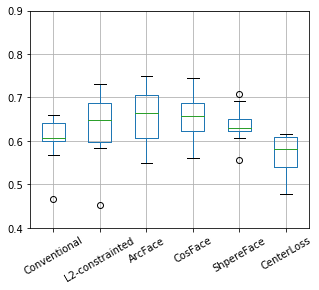

# Stat: Normalized distances


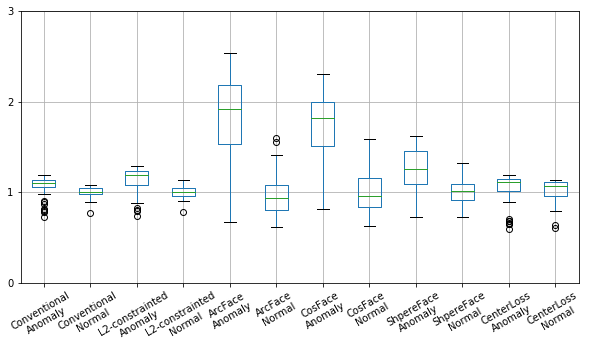


## [0, 1, 2, 3, 4, 5, 6, 7]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.157575,1.218360,2.481163,1.998846,1.321754,1.022421
<unk> 1,1.081652,1.150756,1.464256,1.689759,1.329480,1.015414
<unk> 2,1.137548,1.285473,1.996669,2.193662,1.461710,1.037597
<unk> 3,1.147625,1.270649,2.293811,2.265860,1.327596,0.945089
<unk> 4,1.123741,1.228310,1.687903,1.938352,1.409201,1.063476
<unk> 5,1.105784,1.238983,1.818199,2.032555,1.377616,1.015898
<unk> 6,1.105730,1.206462,1.421663,1.521594,1.355459,1.019946
<unk> 7,1.087898,1.047303,1.325875,1.105819,1.243737,0.945826
8,1.073604,0.972760,0.863041,0.627585,1.140182,0.938168
9,1.063596,1.041080,1.101661,1.310035,1.229474,0.996437



## [1, 2, 3, 4, 5, 6, 7, 8]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
0,1.039019,1.019700,0.865754,0.974261,1.037117,1.107578
<unk> 1,1.052396,1.039099,1.091381,1.204640,0.983095,1.124879
<unk> 2,1.159317,1.231599,1.826073,1.963566,1.466237,1.193779
<unk> 3,1.088103,1.059220,1.110599,1.206617,1.177294,1.117435
<unk> 4,1.154492,1.228602,1.824290,1.823796,1.494188,1.191673
<unk> 5,1.130763,1.177489,1.372181,1.421141,1.222250,1.154141
<unk> 6,1.097092,1.241128,2.216580,2.107596,1.517532,1.164884
<unk> 7,1.102906,1.161388,1.841311,1.943635,1.471916,1.191914
<unk> 8,1.072668,1.187580,2.032729,1.959241,1.232527,1.134813
9,0.972612,0.965522,0.739351,0.766836,0.829473,1.074312



## [2, 3, 4, 5, 6, 7, 8, 9]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
0,1.005574,1.000886,0.815389,0.906621,1.153310,1.072374
1,0.941828,0.931631,0.752289,0.728033,1.016565,1.076655
<unk> 2,1.125661,1.231769,1.825807,1.779952,1.504654,1.166524
<unk> 3,1.022012,1.027753,1.114942,0.954463,1.183043,1.063036
<unk> 4,1.121373,1.199922,1.570169,1.529838,1.429496,1.143064
<unk> 5,1.110263,1.188640,1.668753,1.459502,1.452641,1.124942
<unk> 6,1.096249,1.183582,1.602976,1.587448,1.354316,1.135408
<unk> 7,1.125634,1.199084,2.070161,1.999320,1.414596,1.138807
<unk> 8,1.132963,1.164946,1.972212,1.469704,1.464690,1.141836
<unk> 9,1.009048,1.026912,1.049226,0.810960,1.162078,1.100502



## [3, 4, 5, 6, 7, 8, 9, 0]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,0.807472,0.822380,0.864804,0.859857,1.091424,1.124888
1,0.894109,0.995283,1.064477,0.996385,1.068233,1.120231
2,0.774499,0.782930,0.773064,0.864341,0.990725,1.101745
<unk> 3,0.729427,0.737332,0.671618,0.922668,1.042963,1.081825
<unk> 4,0.784951,0.804024,0.861163,0.948643,0.990331,1.122412
<unk> 5,0.794731,0.799022,1.166543,1.156937,1.128981,1.104576
<unk> 6,0.819824,0.878593,1.371911,1.540287,1.151002,1.114615
<unk> 7,0.866794,0.969090,2.273590,2.024255,1.335333,1.147753
<unk> 8,0.904366,1.068712,2.396626,1.799279,1.205872,1.178792
<unk> 9,0.897238,1.019067,1.567009,1.242744,1.107288,1.148168



## [4, 5, 6, 7, 8, 9, 0, 1]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.136807,1.180657,2.047795,1.966967,1.603278,0.928348
<unk> 1,1.117172,1.223194,2.071562,1.939521,1.441736,1.003211
2,1.078588,1.136815,1.598432,1.584324,1.181227,0.960427
3,0.984096,0.899776,0.972173,0.900557,0.975035,0.792575
<unk> 4,1.089360,1.146782,1.721558,1.688911,1.175615,0.955133
<unk> 5,1.112946,1.196392,2.068589,2.066463,1.468677,0.921391
<unk> 6,1.122495,1.072186,1.684331,1.406773,1.367197,0.891993
<unk> 7,1.074327,1.049852,1.356581,1.378127,1.306183,0.899380
<unk> 8,1.118221,1.121105,2.043509,1.907410,1.586364,0.925406
<unk> 9,1.150093,1.268016,2.443687,2.230430,1.618702,0.967007



## [5, 6, 7, 8, 9, 0, 1, 2]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.166627,1.236709,2.515856,2.273604,1.414946,1.088461
<unk> 1,1.102522,1.229627,2.261590,1.764719,1.477683,1.143531
<unk> 2,1.110487,1.196546,2.093664,1.863364,1.466958,1.127405
3,1.000850,1.045393,1.059357,1.034456,1.037255,0.966755
4,1.067689,1.129788,1.556153,1.363821,1.327852,1.136713
<unk> 5,1.166418,1.242212,2.038345,1.842625,1.258460,1.043973
<unk> 6,1.060279,1.156637,1.859422,1.926229,1.222927,1.087270
<unk> 7,1.051460,1.011837,1.764044,1.763565,1.261244,1.064128
<unk> 8,1.091173,1.086857,2.047033,1.953292,1.291369,1.118585
<unk> 9,1.161927,1.257612,2.533722,1.988638,1.381947,1.140354



## [6, 7, 8, 9, 0, 1, 2, 3]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.163253,1.282553,2.451949,2.031333,0.811311,0.651786
<unk> 1,1.136827,1.259955,2.210558,1.997983,0.905333,0.707452
<unk> 2,1.127459,1.208823,2.054207,1.702327,0.819359,0.655916
<unk> 3,1.152140,1.215514,2.051913,2.300094,0.729607,0.592962
4,1.052055,1.082809,1.415268,1.147845,0.819360,0.638024
5,1.003205,0.938233,0.723722,0.942346,0.724245,0.605542
<unk> 6,1.083512,1.121520,1.569798,1.175331,0.797001,0.647744
<unk> 7,1.174467,1.283977,2.517379,1.663594,0.890281,0.683473
<unk> 8,1.179342,1.284408,2.372394,1.784736,0.889803,0.680288
<unk> 9,1.148277,1.236484,2.098709,1.773842,0.868027,0.688480



## [7, 8, 9, 0, 1, 2, 3, 4]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.178555,1.252421,2.220169,2.247483,1.557813,1.166231
<unk> 1,1.132500,1.245603,2.163959,1.998149,1.467443,1.176090
<unk> 2,1.140899,1.243785,2.085102,2.281983,1.612459,1.169544
<unk> 3,1.188166,1.271104,2.211979,2.224409,1.546671,1.136893
<unk> 4,1.163615,1.265553,2.387275,2.175838,1.560211,1.186310
5,1.005521,0.915598,0.619932,0.673830,0.943881,1.114142
6,1.052709,1.033060,0.960050,1.019239,1.006642,1.120555
<unk> 7,1.106479,1.246581,1.993524,1.657852,1.176051,1.135403
<unk> 8,1.118377,1.231378,2.015525,1.620368,1.244206,1.152468
<unk> 9,1.094044,1.129062,1.555881,1.403208,1.196330,1.146432



## [8, 9, 0, 1, 2, 3, 4, 5]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.142296,1.250683,2.261797,1.859035,1.537890,1.158944
<unk> 1,1.143637,1.207036,2.263405,1.362495,1.376599,1.153077
<unk> 2,1.077618,1.166626,1.486691,2.056616,1.370048,1.137522
<unk> 3,1.042262,1.146184,1.426717,1.745605,1.170849,1.040403
<unk> 4,1.059137,1.123470,1.247785,1.858469,1.240984,1.103999
<unk> 5,1.034837,1.173280,1.339054,2.303578,1.244766,1.096318
6,0.984211,1.006172,0.865872,0.905828,0.981029,1.021782
7,1.020817,0.992663,0.916187,0.734862,1.014526,1.129272
<unk> 8,1.049082,1.040664,1.137829,0.922063,1.098287,1.129760
<unk> 9,1.153300,1.276569,2.185502,1.849279,1.570173,1.119363



## [9, 0, 1, 2, 3, 4, 5, 6]: normalized mean distance


,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
<unk> 0,1.016365,1.076035,1.742706,1.529060,0.831944,1.041438
<unk> 1,1.094368,1.196408,1.842528,1.808122,0.901332,1.173396
<unk> 2,1.082930,1.219760,2.148508,1.905730,0.883646,1.101113
<unk> 3,0.977346,1.068512,1.382450,1.665295,0.732465,0.981033
<unk> 4,1.085401,1.238666,2.418674,2.145118,0.901129,1.137643
<unk> 5,1.054223,1.166520,1.863628,1.965187,0.858551,1.079070
<unk> 6,1.043593,1.082013,1.585489,1.387629,0.815398,1.085241
7,0.958493,1.024279,1.260609,1.315648,0.723106,0.961550
8,1.026924,1.085624,1.077216,1.203146,0.800764,1.065162
<unk> 9,1.077920,1.227696,2.180371,1.824843,0.849291,1.131018


In [21]:
normalized_anomaly_distances, normalized_normal_distances, aucs = toytest.test_summary(dist_range=[0, 1, 2, 3])
toytest.save_results('results_AnomalyCIFAR10')

In [22]:
aucs.describe()

,Conventional,L2-constrained,ArcFace,CosFace,ShpereFace,CenterLoss
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.603560,0.634430,0.656541,0.654339,0.636673,0.569736
std,0.055741,0.078755,0.063906,0.054653,0.042041,0.046599
min,0.467351,0.453211,0.550388,0.561250,0.556810,0.478972
25%,0.599356,0.597732,0.606438,0.622086,0.622925,0.540257
50%,0.606289,0.649073,0.665117,0.656524,0.630776,0.581217
75%,0.640917,0.687544,0.704944,0.688385,0.650852,0.610097
max,0.660386,0.729957,0.749674,0.745051,0.707441,0.616568


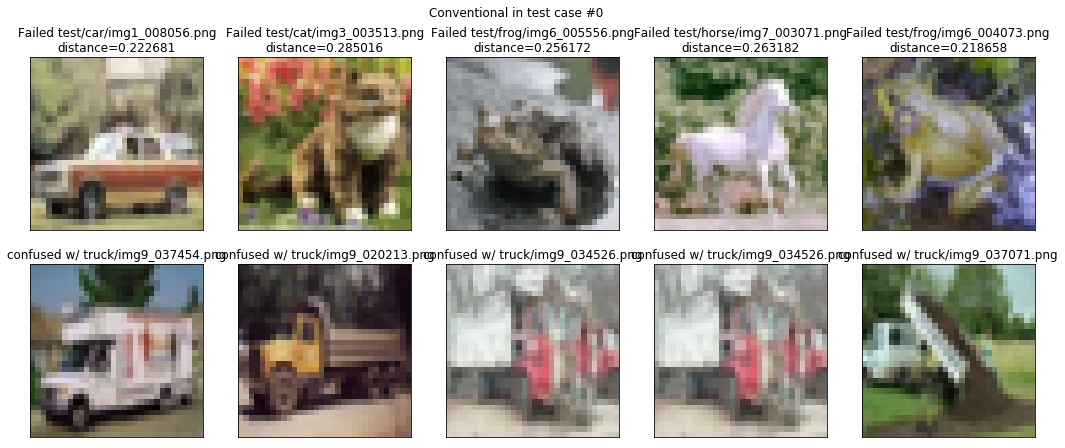

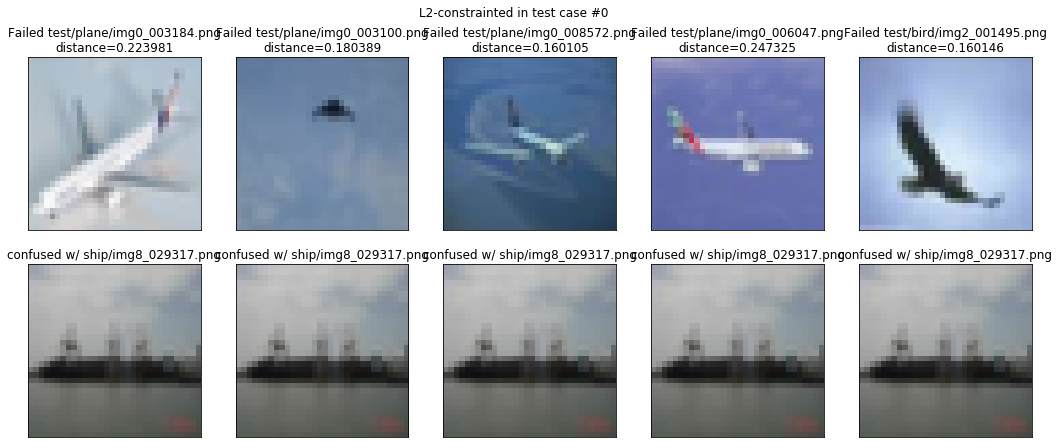

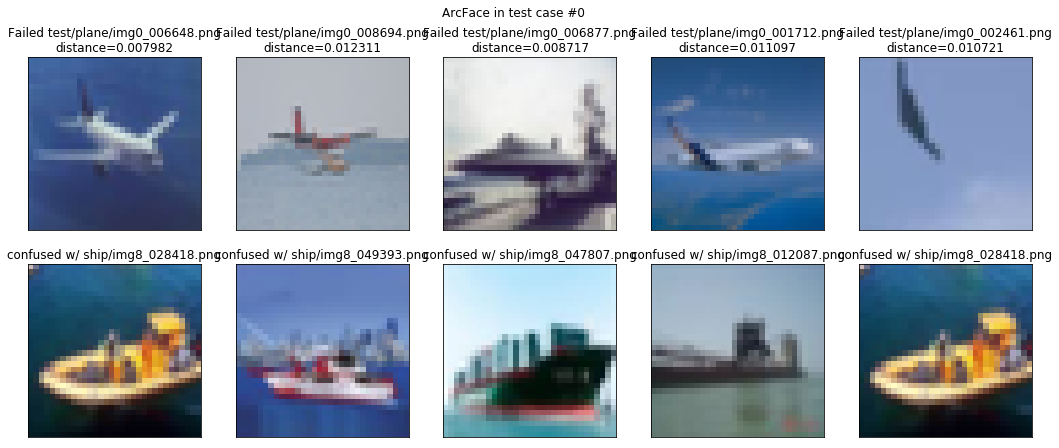

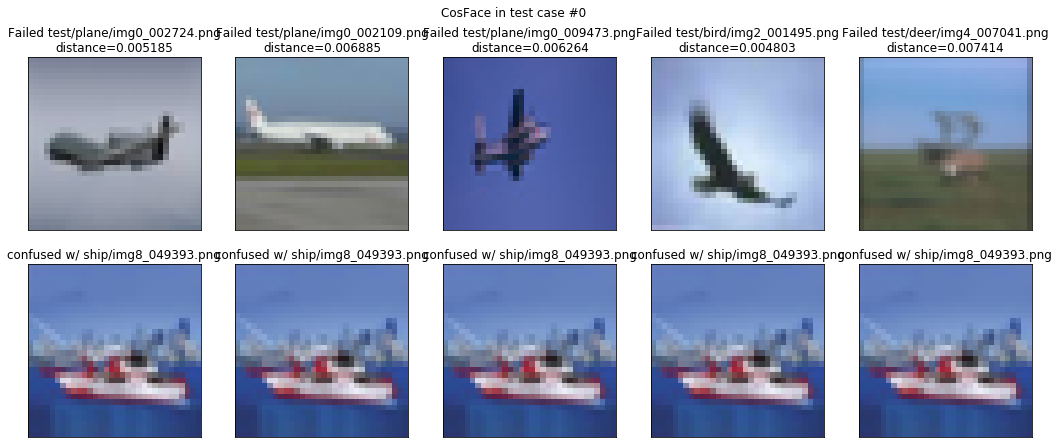

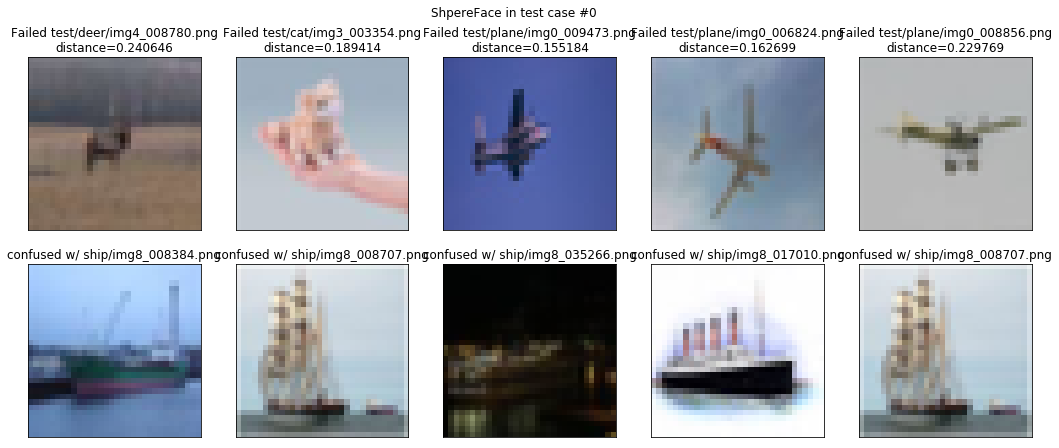

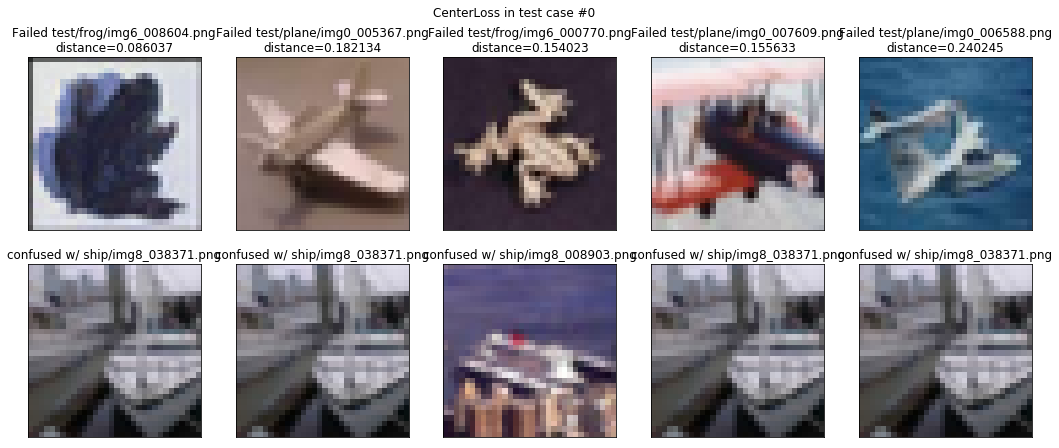

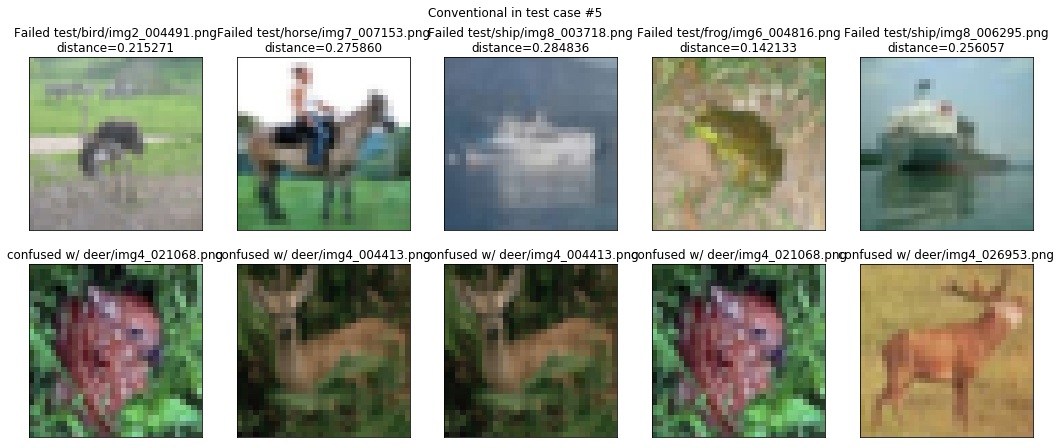

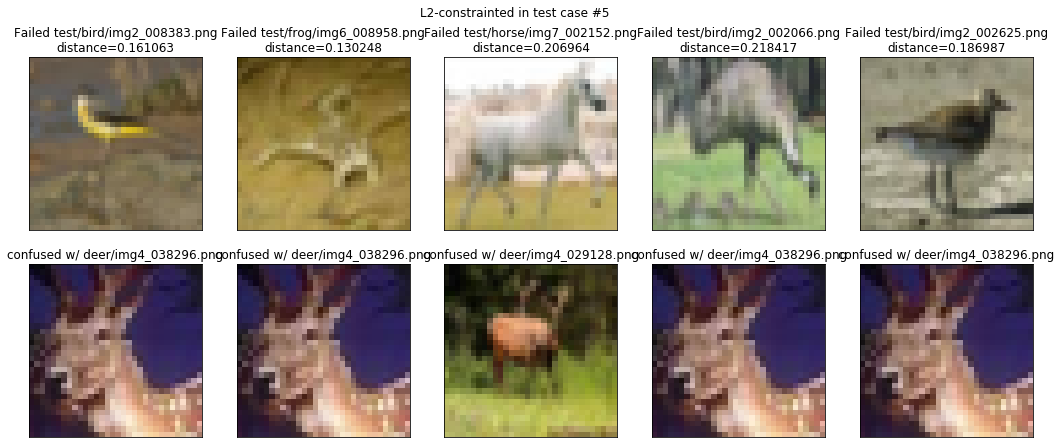

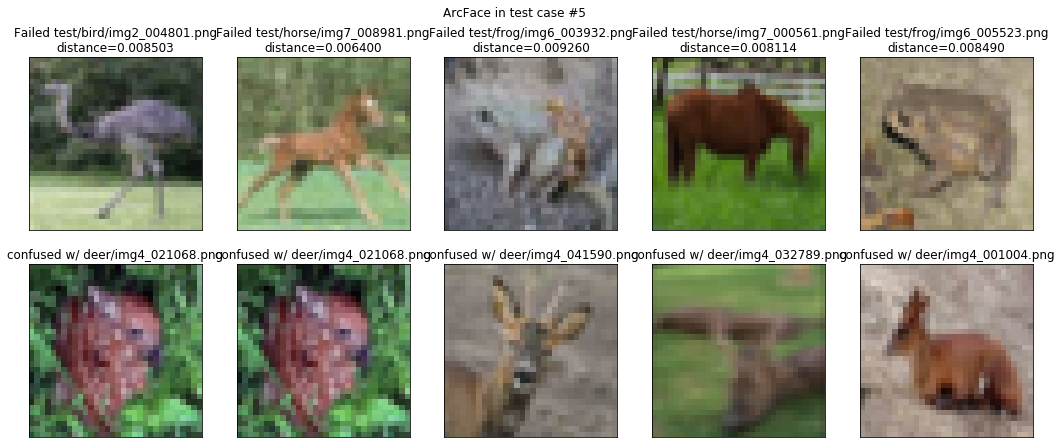

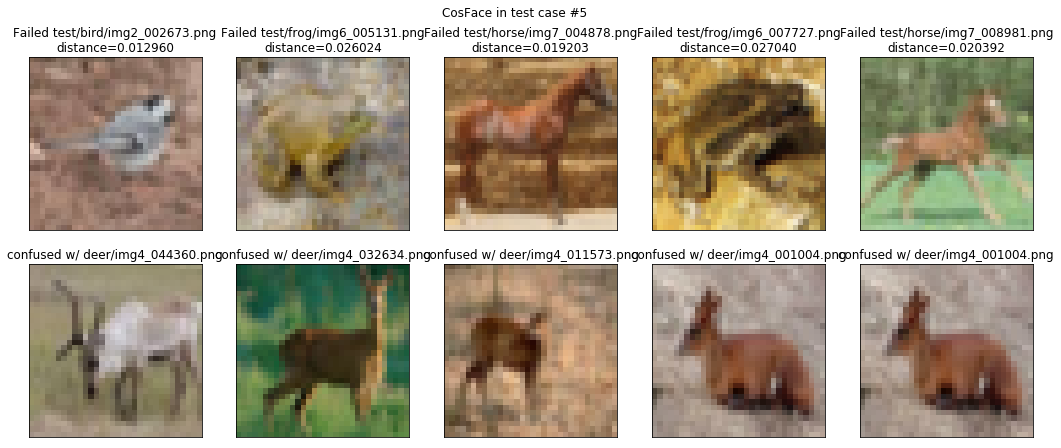

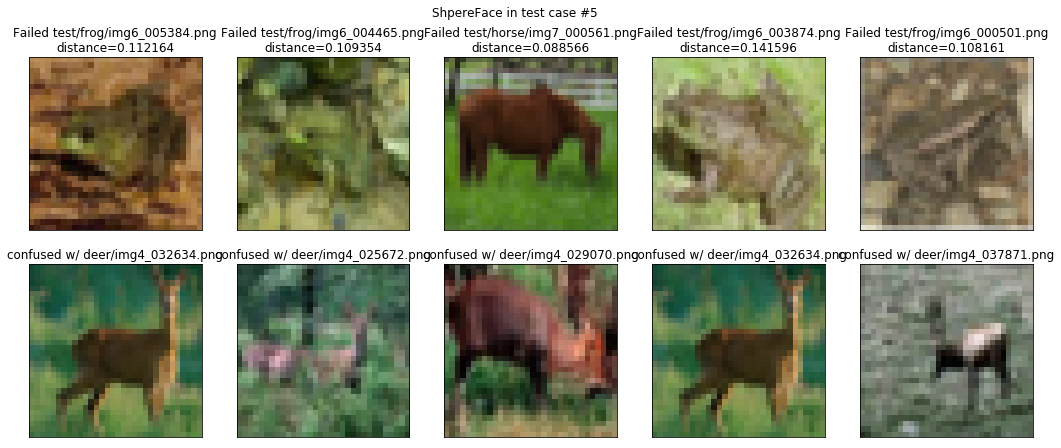

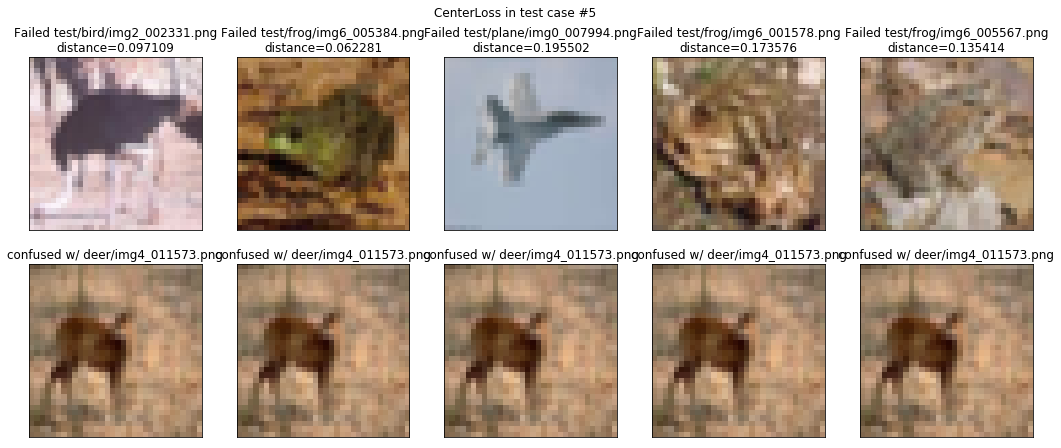

In [20]:
for i in [0, 5]: toytest.show_all_worst_test_images(i)